Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import clone
from sklearn.decomposition import PCA
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

Import Data

In [2]:
trainingData=pd.read_csv('data/train.csv', index_col='id')

testingData=pd.read_csv('data/test.csv', index_col='id')

#View All Data Columns
pd.set_option('display.max_columns',None)

In [3]:
trainingData.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
testingData.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [5]:
print("**********Checking Missing Values in Training Data**********:\n",trainingData.isna().sum(),"\n**********Checking Complete**********")
print("**********Checking Missing Values in Testing Data**********:\n",testingData.isna().sum(),"\n************Checking Complete**********")

**********Checking Missing Values in Training Data**********:
 loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64 
**********Checking Complete**********
**********Checking Missing Values in Testing Data**********:
 loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment         

In [6]:
#Checking duplicates values
print("**********Checking Duplicates in Training Data**********:\n",trainingData.duplicated().sum()," \n**********Checking Complete**********\n")

print("**********Checking Duplicates in Testing Data**********:\n",testingData.duplicated().sum()," \n**********Checking Complete**********")

**********Checking Duplicates in Training Data**********:
 0  
**********Checking Complete**********

**********Checking Duplicates in Testing Data**********:
 0  
**********Checking Complete**********


In [7]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

Training Data Distribution

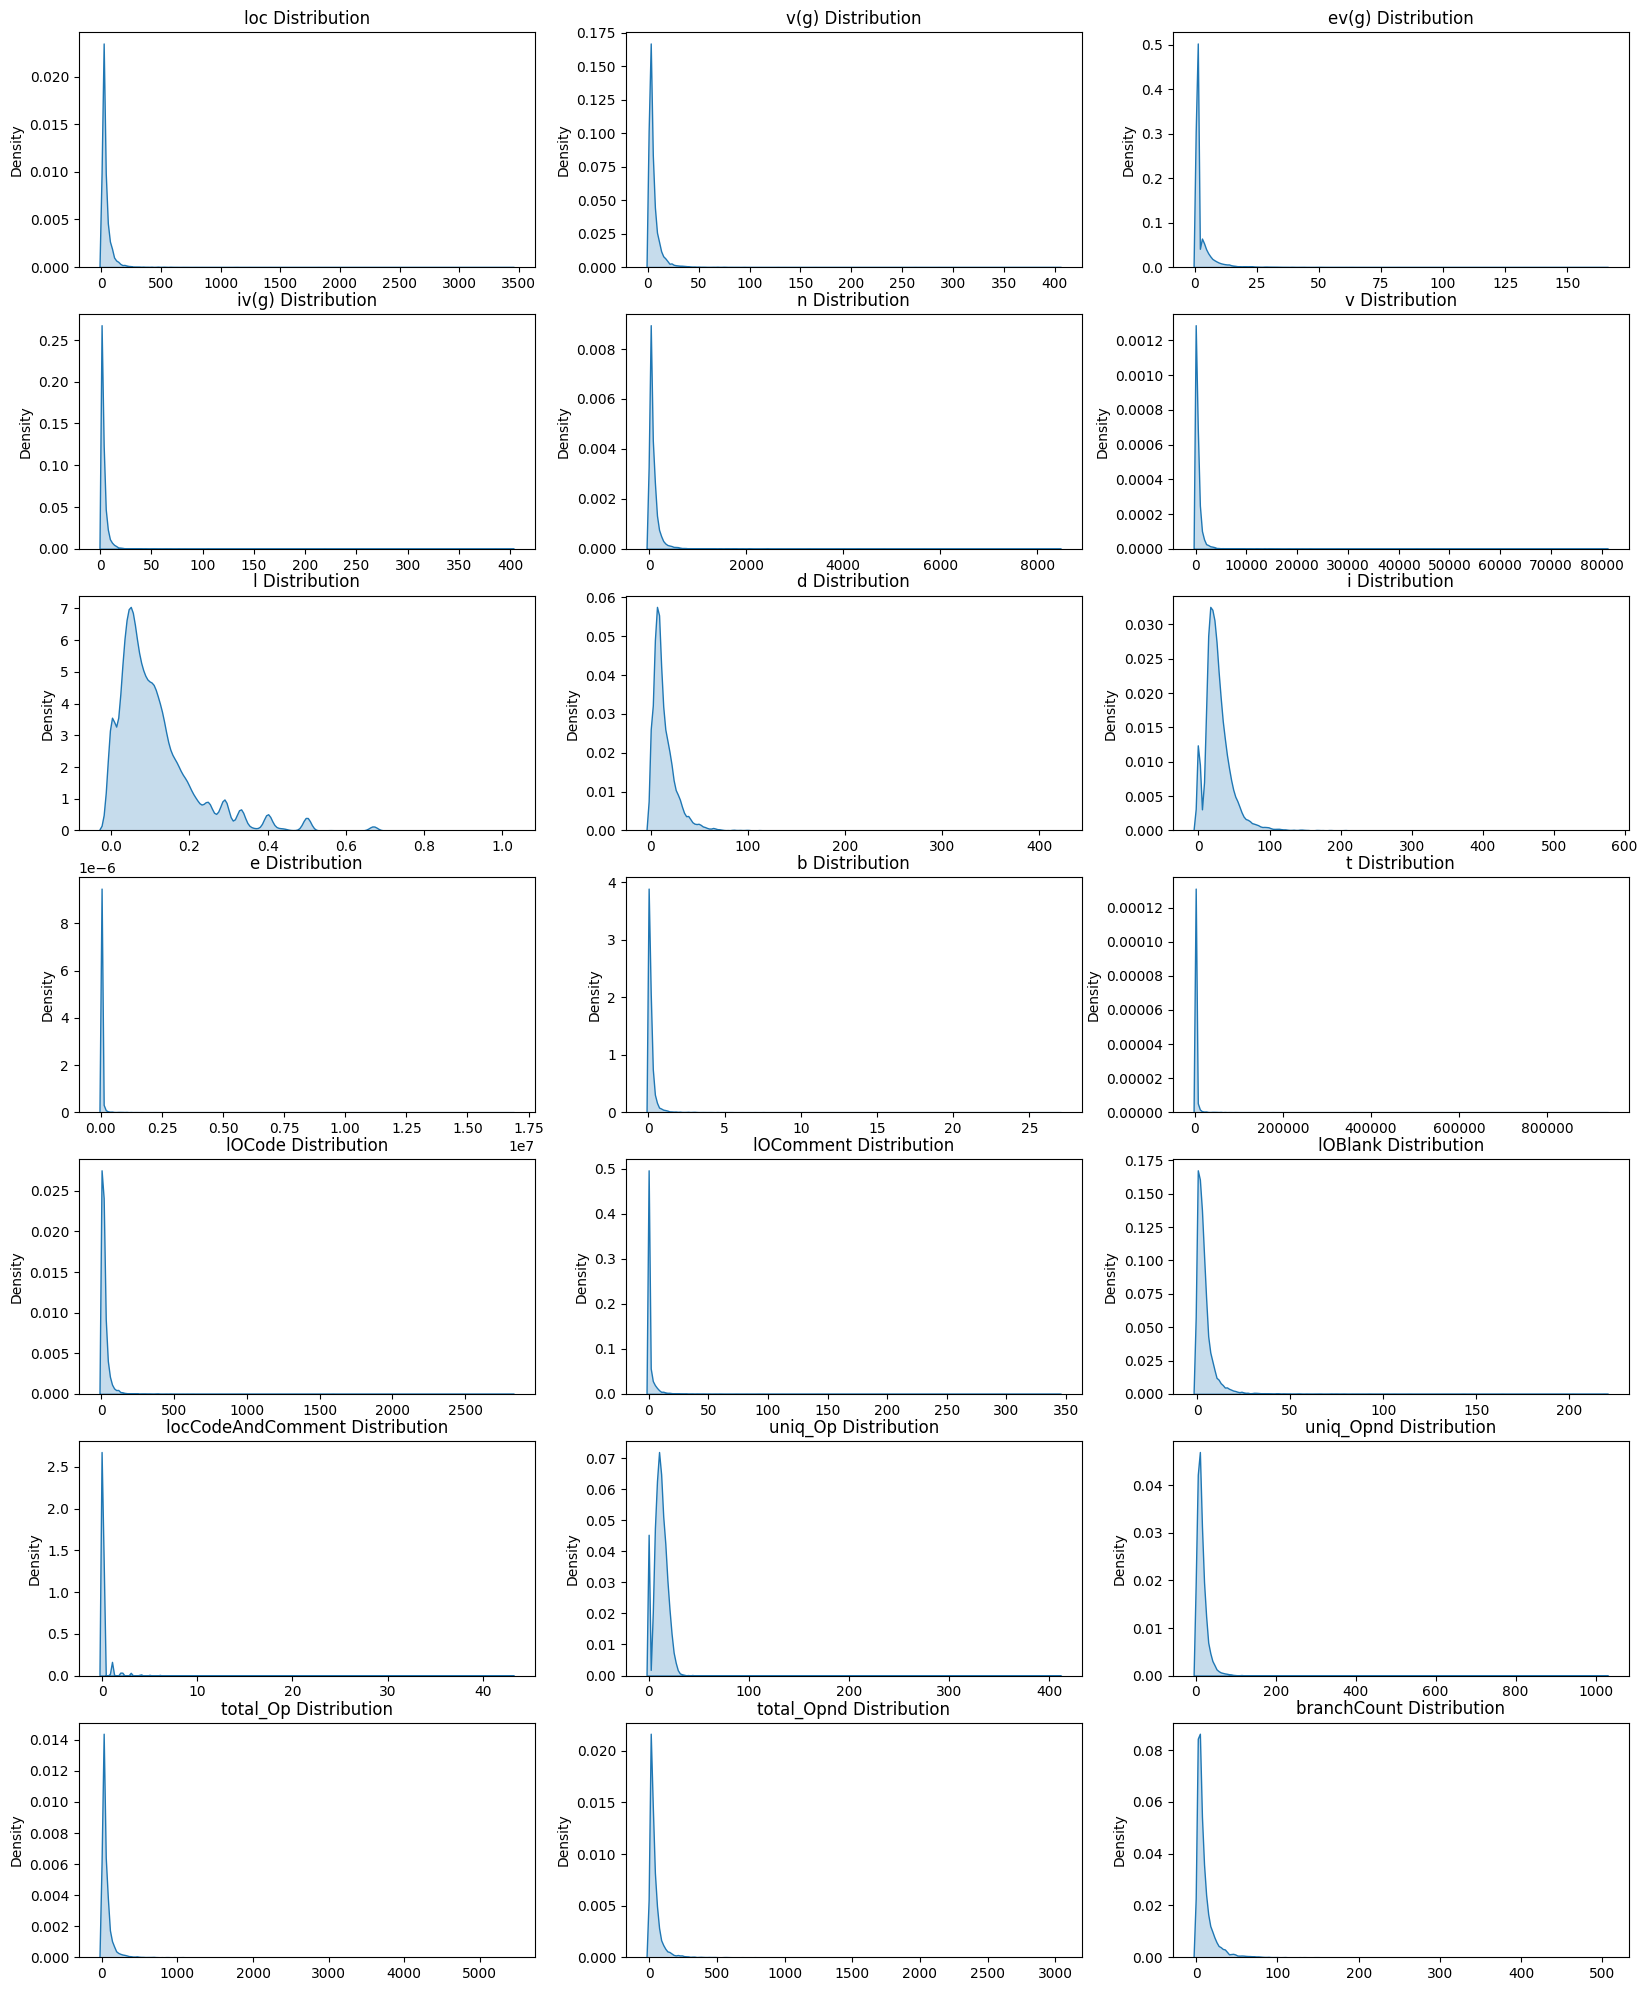

In [8]:
data = trainingData.copy()
label = data.pop('defects')
fig, ax = plt.subplots(7,3,figsize=(20,25))
ax = ax.flatten()
for i, column in enumerate(data):
    sns.kdeplot(data[column],ax=ax[i],fill=True)
    ax[i].set_title(f"{column} Distribution")
    ax[i].set_xlabel(None)
plt.show()

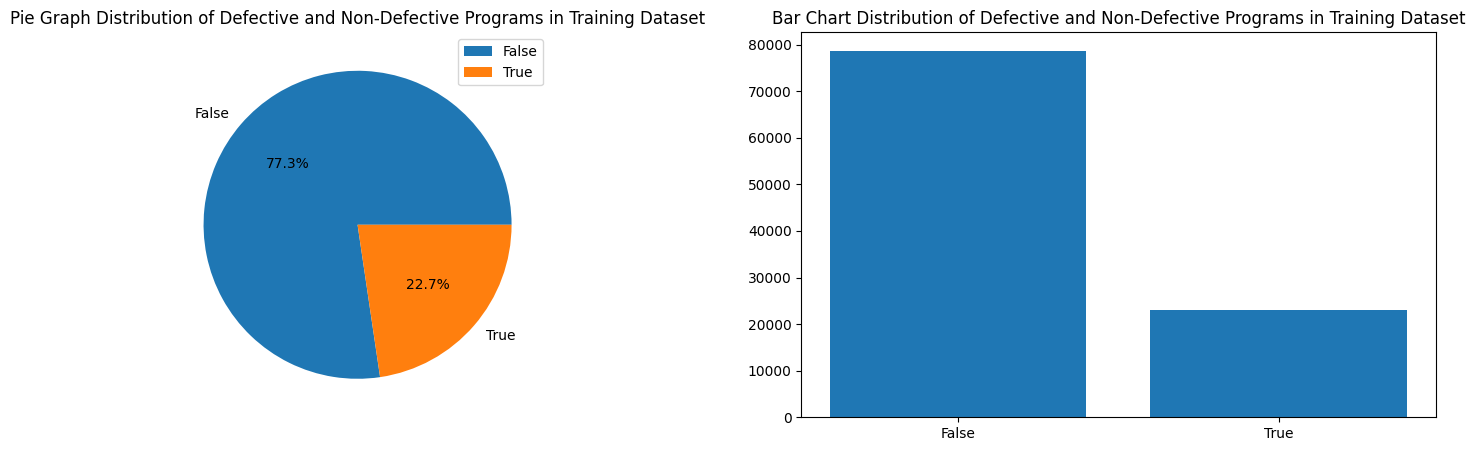

Total Number of Values: 101763
Number of Programs with Defects: 23064
Number of Programs without Defects:78699


In [9]:
fig,ax = plt.subplots(1,2,figsize=(18,5))
ax.flatten()
ax[0].pie([trainingData['defects'].value_counts()[False],trainingData['defects'].value_counts()[True]],labels=["False","True"],autopct='%1.1f%%')
ax[0].legend()
ax[0].set_title("Pie Graph Distribution of Defective and Non-Defective Programs in Training Dataset")

ax[1].bar(["False","True"],[trainingData['defects'].value_counts()[False],trainingData['defects'].value_counts()[True]])
ax[1].set_title("Bar Chart Distribution of Defective and Non-Defective Programs in Training Dataset")
plt.show()

print(f"Total Number of Values: {trainingData['defects'].count()}")
print(f"Number of Programs with Defects: {trainingData['defects'].value_counts()[True]}")
print(f"Number of Programs without Defects:{trainingData['defects'].value_counts()[False]}")

Training Data Correlation

In [10]:
correlations = trainingData.corr()

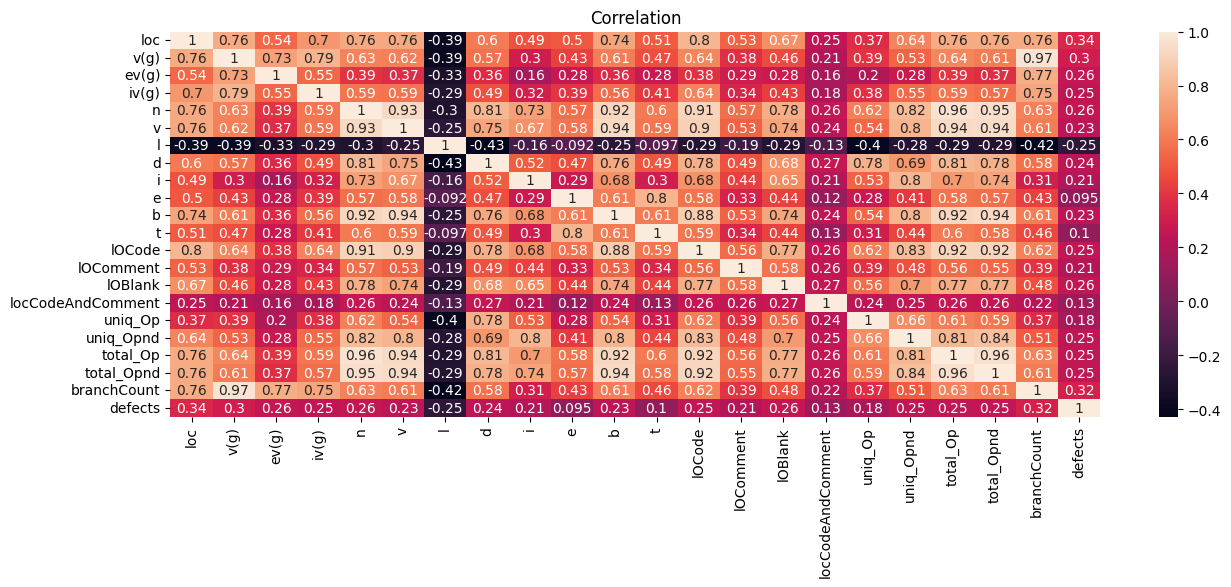

In [11]:
plt.figure(figsize=(15,5))
plt.title("Correlation")
sns.heatmap(correlations,annot=True,annot_kws = {'size' : 10})
plt.show()

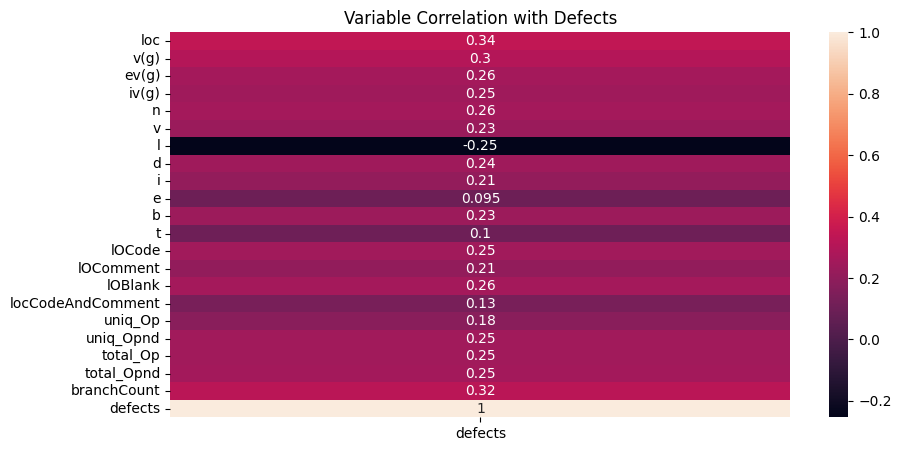

In [12]:
plt.figure(figsize=(10,5))
plt.title("Variable Correlation with Defects")
sns.heatmap(correlations[['defects']], annot=True)
plt.show()

In [13]:
# Replace False with 0 and True with 1 in the 'defects' column
trainingData['defects'] = trainingData['defects'].map({False: 0, True: 1})

Data Feature Selection

In [14]:
# Create a function to calculate VIF for all variables
threshold = 10
def calculate_vif(data_frame):
    to_drop = []
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) 
                       for i in range(data_frame.shape[1])]
     
    for i in range(vif_data.shape[0]):
          vif = vif_data.loc[i, "VIF"]
                        
          if vif > threshold:
            to_drop.append(vif_data.loc[i, "Variable"])
    return vif_data, to_drop
# Calculate VIF for the train dataset
vif_values, to_drop = calculate_vif(trainingData)

print("VIF Values for Training set:")
print(vif_values)

VIF Values for Training set:
             Variable        VIF
0                 loc   7.023452
1                v(g)  29.890746
2               ev(g)   3.738180
3               iv(g)   4.459707
4                   n  24.689889
5                   v  15.384746
6                   l   1.851483
7                   d  11.538139
8                   i   9.407622
9                   e   3.155956
10                  b  13.471010
11                  t   3.195427
12             lOCode  13.930293
13          lOComment   1.798953
14            lOBlank   4.546524
15  locCodeAndComment   1.160908
16            uniq_Op  11.277786
17          uniq_Opnd  10.462470
18           total_Op  28.514891
19         total_Opnd  28.862118
20        branchCount  30.729084
21            defects   1.535713


In [15]:
# Print out the columns to be dropped
print("The following columns have high VIF and will be dropped:")
print(to_drop)

# Drop the columns from the train and test sets
trainingData_cleaned = trainingData.drop(to_drop, axis=1)
testingData_cleaned = testingData.drop(to_drop, axis=1)

print("\n Training Data (Cleaned):")
print(trainingData_cleaned.head())

print("\n Testing Data (Cleaned):")
print(testingData_cleaned.head())

The following columns have high VIF and will be dropped:
['v(g)', 'n', 'v', 'd', 'b', 'lOCode', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

 Training Data (Cleaned):
     loc  ev(g)  iv(g)     l      i        e       t  lOComment  lOBlank  \
id                                                                         
0   22.0    1.0    2.0  0.06  14.25  5448.79  302.71          1        1   
1   14.0    1.0    2.0  0.14  21.11   936.71   52.04          0        1   
2   11.0    1.0    2.0  0.11  22.76  1754.01   97.45          0        1   
3    8.0    1.0    1.0  0.19  17.86   473.66   26.31          0        2   
4   11.0    1.0    2.0  0.18  12.44   365.67   20.31          0        2   

    locCodeAndComment  defects  
id                              
0                   0        0  
1                   0        0  
2                   0        0  
3                   0        1  
4                   0        0  

 Testing Data (Cleaned):
          loc  ev(g)  

Data Outllier Detection and Standardization

In [16]:
# Splitting the data into features (X) and the target variable (y)
X_train = trainingData_cleaned.drop(columns=["defects"])
y_train = trainingData_cleaned.defects

/tmp/ipykernel_6696/3021081393.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


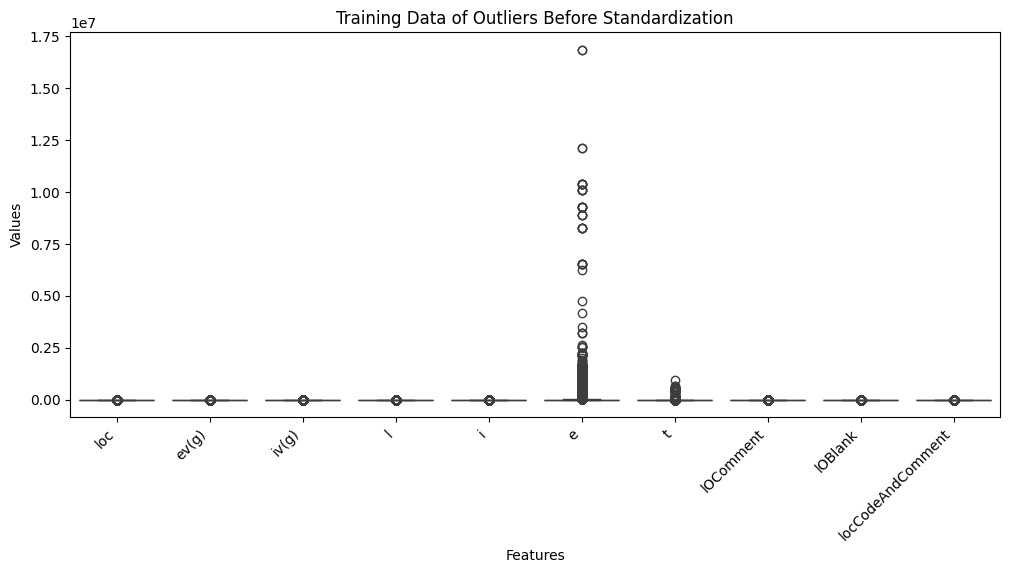

/tmp/ipykernel_6696/3021081393.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


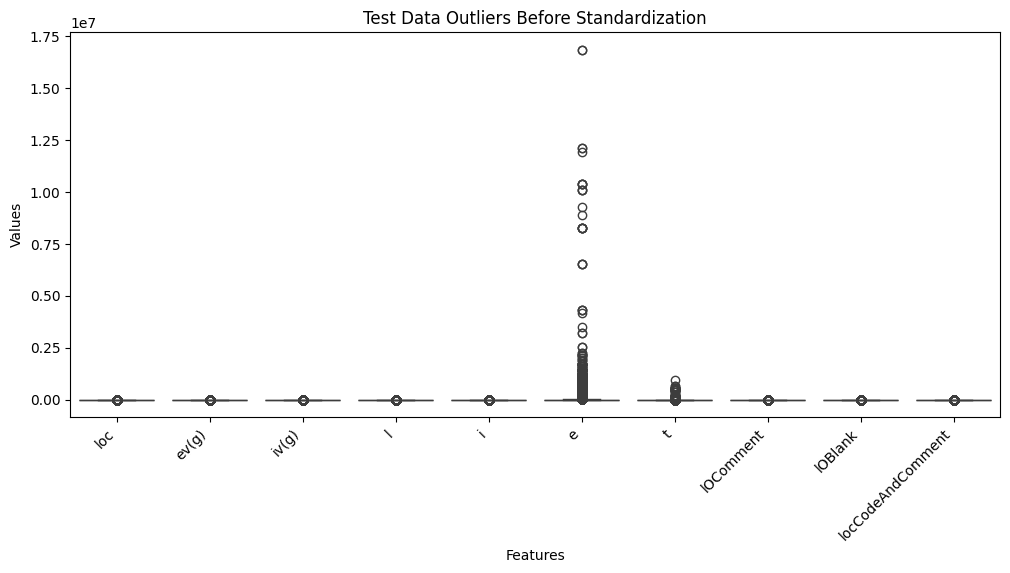

In [17]:

#Before Standardization

# Define a function to draw boxplots with outliers marked
def draw_boxplot_with_outliers(data, title):
    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data=data, showfliers=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

draw_boxplot_with_outliers(X_train, title='Training Data of Outliers Before Standardization')
draw_boxplot_with_outliers(testingData_cleaned, title='Test Data Outliers Before Standardization')

/tmp/ipykernel_6696/1849473018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


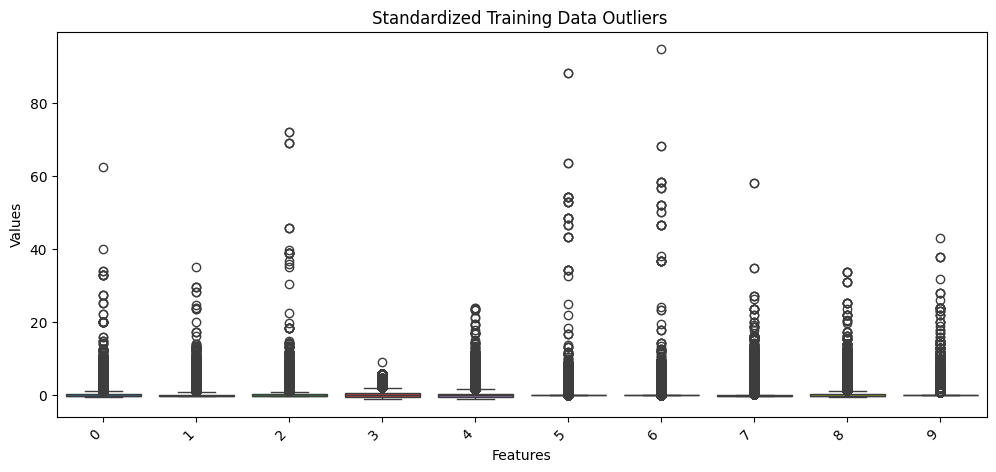

/tmp/ipykernel_6696/1849473018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


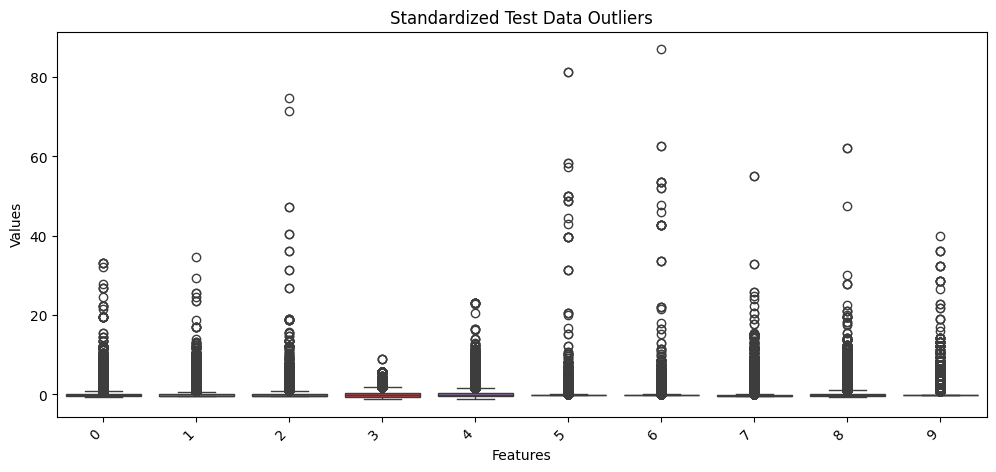

In [18]:
# Define a function to draw boxplots with outliers marked
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
TestingData_cleaned_standardized = scaler.fit_transform(testingData_cleaned)
    
def draw_boxplot_with_outliers(data, title):

    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data=data, showfliers=True)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

draw_boxplot_with_outliers(X_train, title='Standardized Training Data Outliers ')
draw_boxplot_with_outliers(TestingData_cleaned_standardized, title='Standardized Test Data Outliers')

Cross Validation

In [19]:
#Calculates Each Model's Training and Validation ROC AUC, Accuracy, and F1 Scores for Each Fold
#Display the mean ROC AUC scores (Training and Validation Scores), Accuracy, and F1 scores
def crossValidation(X, Y, model, model_name, rskf):
    #Copy Training Data to prevent modification
    X_copy = X.copy()
    Y_copy = Y.copy()
    
    #Initialize Scores and Validation Predictions
    training_scores, validation_scores, accuracy_scores, f1_scores=[],[],[],[]
    validation_predictions = np.zeros((len(X_copy)))
    
    for i, (train_index, validation_index) in enumerate(rskf.split(X,Y)):
        
        #Clone the model to prevent modification of untrained input model
        m = clone(model)
        
        #Define Training and Validation Sets
        training_X, validation_X = X_copy[train_index], X_copy[validation_index]
        training_Y, validation_Y = Y_copy[train_index], Y_copy[validation_index]
        
        #Fit Model
        m.fit(training_X,training_Y)
        predicted_Y = m.predict(validation_X) 
        
        accuracy = accuracy_score(predicted_Y, validation_Y)
        f1 = f1_score(predicted_Y, validation_Y)
        
        training_prediction = m.predict_proba(training_X)[:,1]
        validation_prediction = m.predict_proba(validation_X)[:,1]

        validation_predictions[validation_index] += validation_prediction
        
        training_score = roc_auc_score(training_Y,training_prediction)
        validation_score = roc_auc_score(validation_Y, validation_prediction)
        
        training_scores.append(training_score)
        validation_scores.append(validation_score)
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
    print(f"Training Score: {np.round(np.mean(training_scores),decimals=7)}\tValidation Score: {np.round(np.mean(validation_scores),decimals=7)}\tAccuracy: {np.round(np.mean(accuracy_scores),decimals=7)}\tF1 Score: {np.round(np.mean(f1_scores),decimals=7)}\tModel: {model_name}")

    return training_scores, validation_scores, accuracy_scores, f1_scores

    

In [20]:
#Seed for Repetition
seed = 10
np.random.seed(seed)

#Create a Repeated K-Fold Cross Validator
rskf = RepeatedStratifiedKFold(random_state=seed)

In [21]:
%%script echo skipping
models = [
    ('gaussian_nb', GaussianNB()),
    ('bernoulli_nb', BernoulliNB()),
    ('decision_tree', DecisionTreeClassifier(random_state=seed)),
    ('knn', KNeighborsClassifier()),
    ('logistic_regression', LogisticRegression(random_state = seed)),
    ('random_forest', RandomForestClassifier(random_state = seed)),
    ('gradient_boosting', GradientBoostingClassifier(random_state = seed)),
    ('hist_gradient_boosting', HistGradientBoostingClassifier(random_state = seed)),
    ('lgbm', LGBMClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed)),
    ('cat_boost', CatBoostClassifier(random_state = seed,verbose=0)),
]

BaseTrainingScores, BaseValScores, BaseAccuracyScores, BaseF1Scores = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for (model_name, model) in models:
    BaseTrainingScores[model_name], BaseValScores[model_name], BaseAccuracyScores[model_name], BaseF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

BaseTrainingScores.to_csv("data/Base_Models/Base_Training_Scores.csv", index=False)
BaseValScores.to_csv("data/Base_Models/Base_Validation_Scores.csv", index=False)
BaseAccuracyScores.to_csv("data/Base_Models/Base_Accuracy_Scores.csv", index=False)
BaseF1Scores.to_csv("data/Base_Models/Base_F1_Scores.csv", index=False)
    

skipping


Training Score: 0.7671589	Validation Score: 0.7671437	Accuracy: 0.8006672	F1 Score: 0.3837027	Model: gaussian_nb
Training Score: 0.760931	Validation Score: 0.7608771	Accuracy: 0.7692737	F1 Score: 0.5317257	Model: bernoulli_nb
Training Score: 0.9995711	Validation Score: 0.6138554	Accuracy: 0.7248548	F1 Score: 0.3985115	Model: decision_tree
Training Score: 0.884046	Validation Score: 0.7194356	Accuracy: 0.7890225	F1 Score: 0.4495136	Model: knn
Training Score: 0.7781648	Validation Score: 0.7780576	Accuracy: 0.8067461	F1 Score: 0.3711798	Model: logistic_regression
Training Score: 0.9985411	Validation Score: 0.759114	Accuracy: 0.8024754	F1 Score: 0.461492	Model: random_forest
Training Score: 0.7948394	Validation Score: 0.7906932	Accuracy: 0.8146203	F1 Score: 0.4898802	Model: gradient_boosting
Training Score: 0.8028327	Validation Score: 0.7906572	Accuracy: 0.8147686	F1 Score: 0.4876493	Model: hist_gradient_boosting
Training Score: 0.810897	Validation Score: 0.7903612	Accuracy: 0.8147549	F1 Sc

<Axes: title={'center': "Base Models' Mean F1 Scores"}>

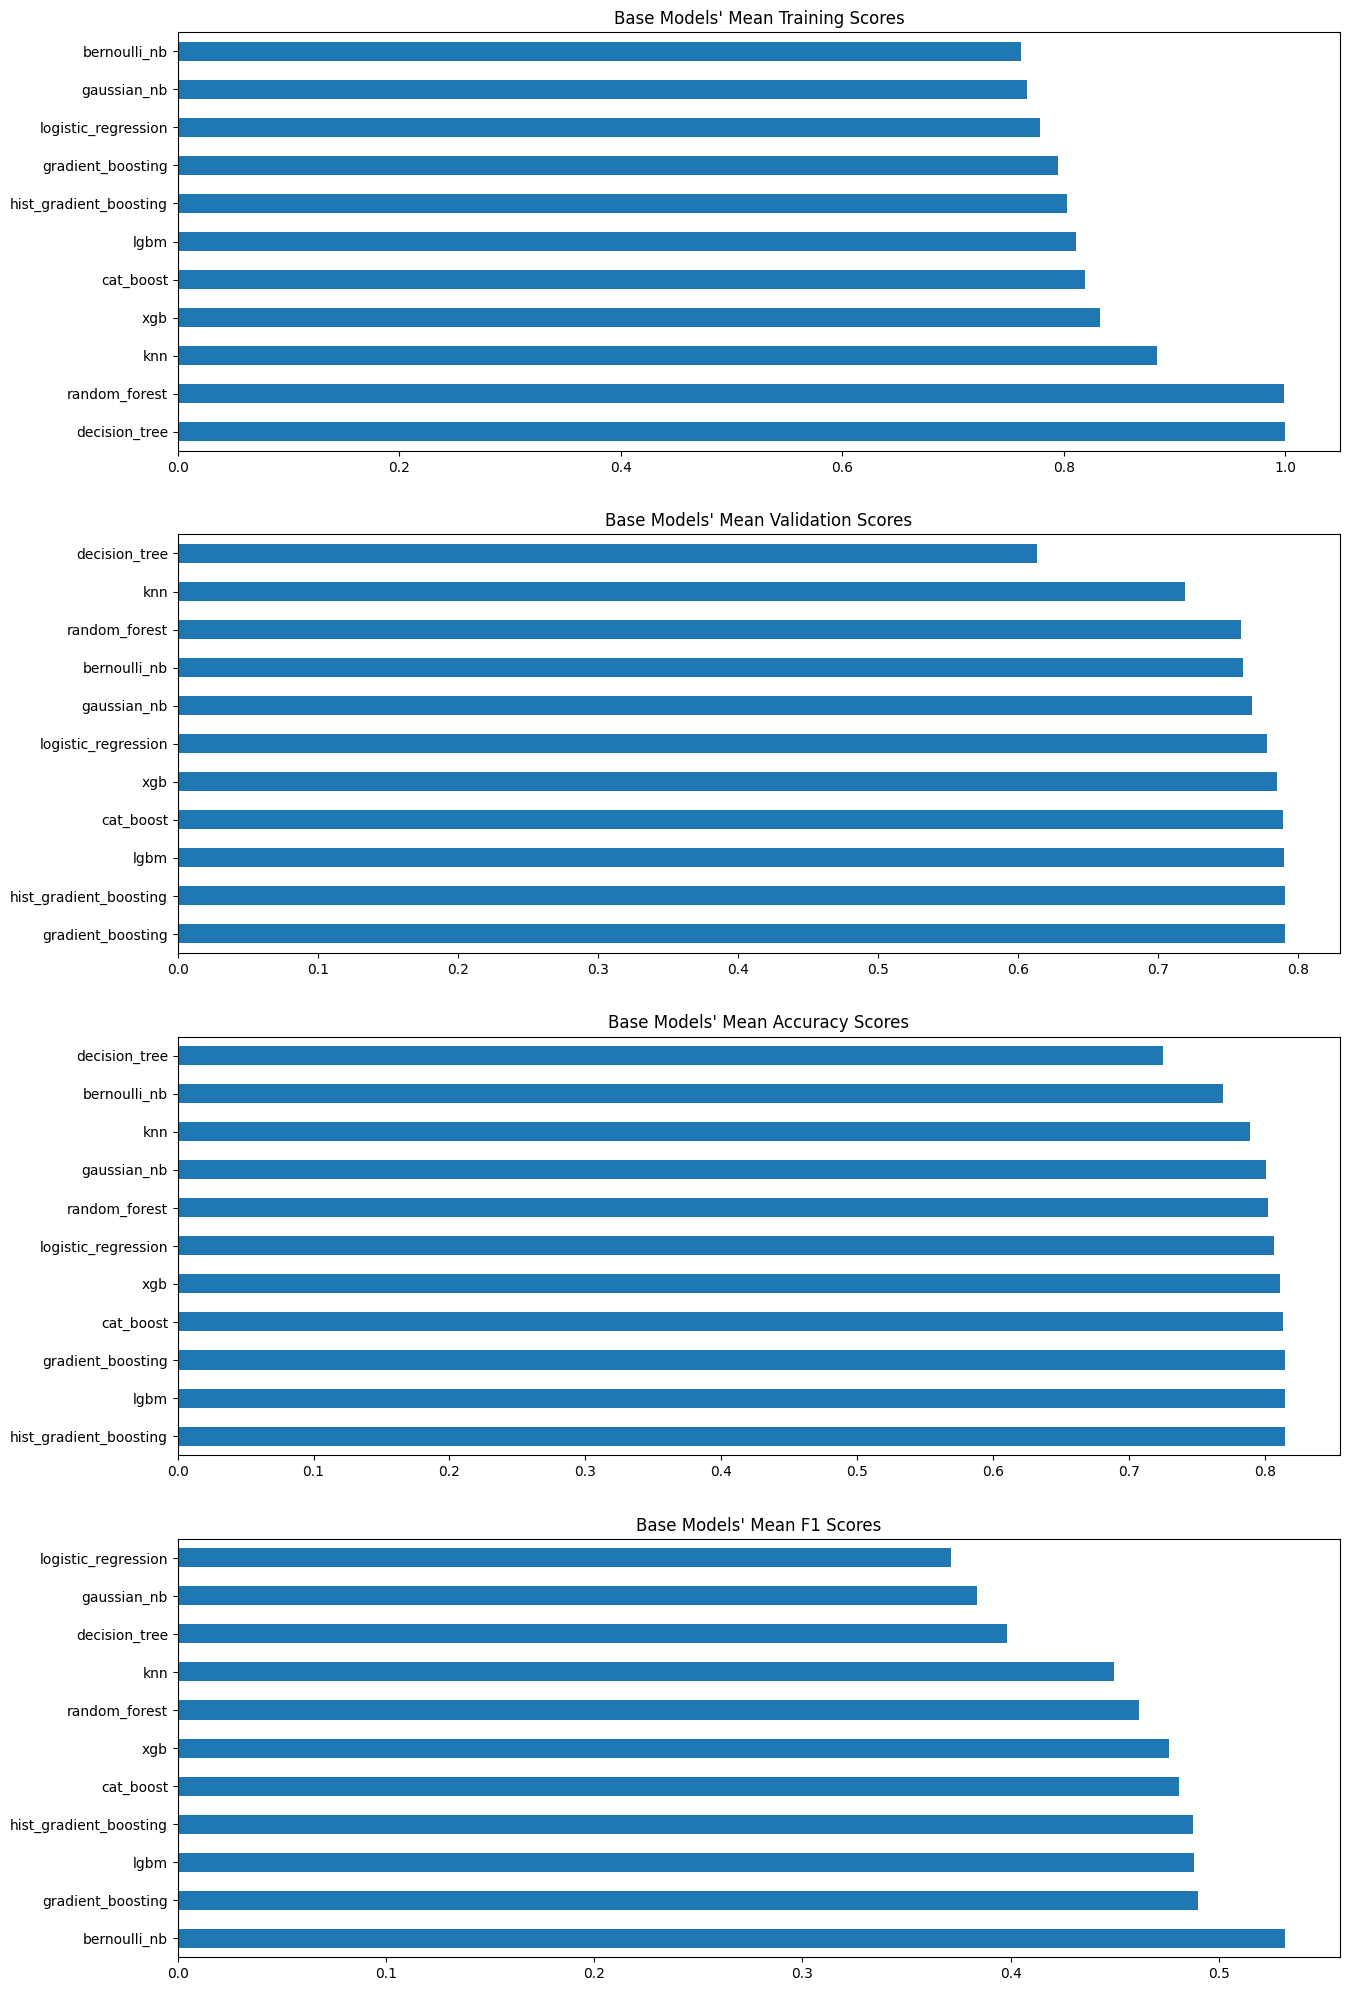

In [22]:
#Plot the Mean of the Validation Scores for Each Model 
BaseTrain = pd.read_csv("data/Base_Models/Base_Training_Scores.csv")
BaseValidation = pd.read_csv("data/Base_Models/Base_Validation_Scores.csv")
BaseAccuracy = pd.read_csv("data/Base_Models/Base_Accuracy_Scores.csv")
BaseF1 = pd.read_csv("data/Base_Models/Base_F1_Scores.csv")
modelName = ['gaussian_nb','bernoulli_nb','decision_tree','knn','logistic_regression', 'random_forest', 'gradient_boosting','hist_gradient_boosting','lgbm', 'xgb','cat_boost']
for i in range(11):
    print(f"Training Score: {np.round(np.mean(BaseTrain.mean()[i]),decimals=7)}\tValidation Score: {np.round(np.mean(BaseValidation.mean()[i]),decimals=7)}\tAccuracy: {np.round(np.mean(BaseAccuracy.mean()[i]),decimals=7)}\tF1 Score: {np.round(np.mean(BaseF1.mean()[i]),decimals=7)}\tModel: {modelName[i]}")


fig, ax = plt.subplots(4,figsize = (15,25))
BaseTrain.mean().sort_values(ascending=False).plot(kind="barh",title="Base Models' Mean Training Scores",ax=ax[0])
BaseValidation.mean().sort_values(ascending=False).plot(kind="barh",title="Base Models' Mean Validation Scores",ax=ax[1])
BaseAccuracy.mean().sort_values(ascending=False).plot(kind="barh",title="Base Models' Mean Accuracy Scores",ax=ax[2])
BaseF1.mean().sort_values(ascending=False).plot(kind="barh",title="Base Models' Mean F1 Scores",ax=ax[3])

Finding the Optimal Models By Adjusting Hyper Parameters Through Cross Validation

In [23]:
#Stores Models with "Optimal" Hyper Parameters
optimalModel = []

Optimize Gaussian NB Through Var_Smoothing

In [24]:
%%script echo skipping

GNB = []
varSmooth = np.logspace(0,-9, num=100)

GNBTrainScores,GNBValScores,GNBAccuracyScores,GNBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(100):
    GNB.append(('GaussianNB_VS_'+str(varSmooth[i]), GaussianNB(var_smoothing=varSmooth[i])),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in GNB:
    GNBTrainScores[model_name],GNBValScores[model_name],GNBAccuracyScores[model_name],GNBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#GNBTrainScores.to_csv("data/Gaussian_NB/Gaussian_Training_Scores.csv",index=False)
#GNBValScores.to_csv("data/Gaussian_NB/Gaussian_Validation_Scores.csv",index=False)
#GNBAccuracyScores.to_csv("data/Gaussian_NB/Gaussian_Accuracy_Scores.csv",index=False)
#GNBF1Scores.to_csv("data/Gaussian_NB/Gaussian_F1_Scores.csv",index=False)

skipping


Top Model:GaussianNB_VS_1.0    0.77038
dtype: float64


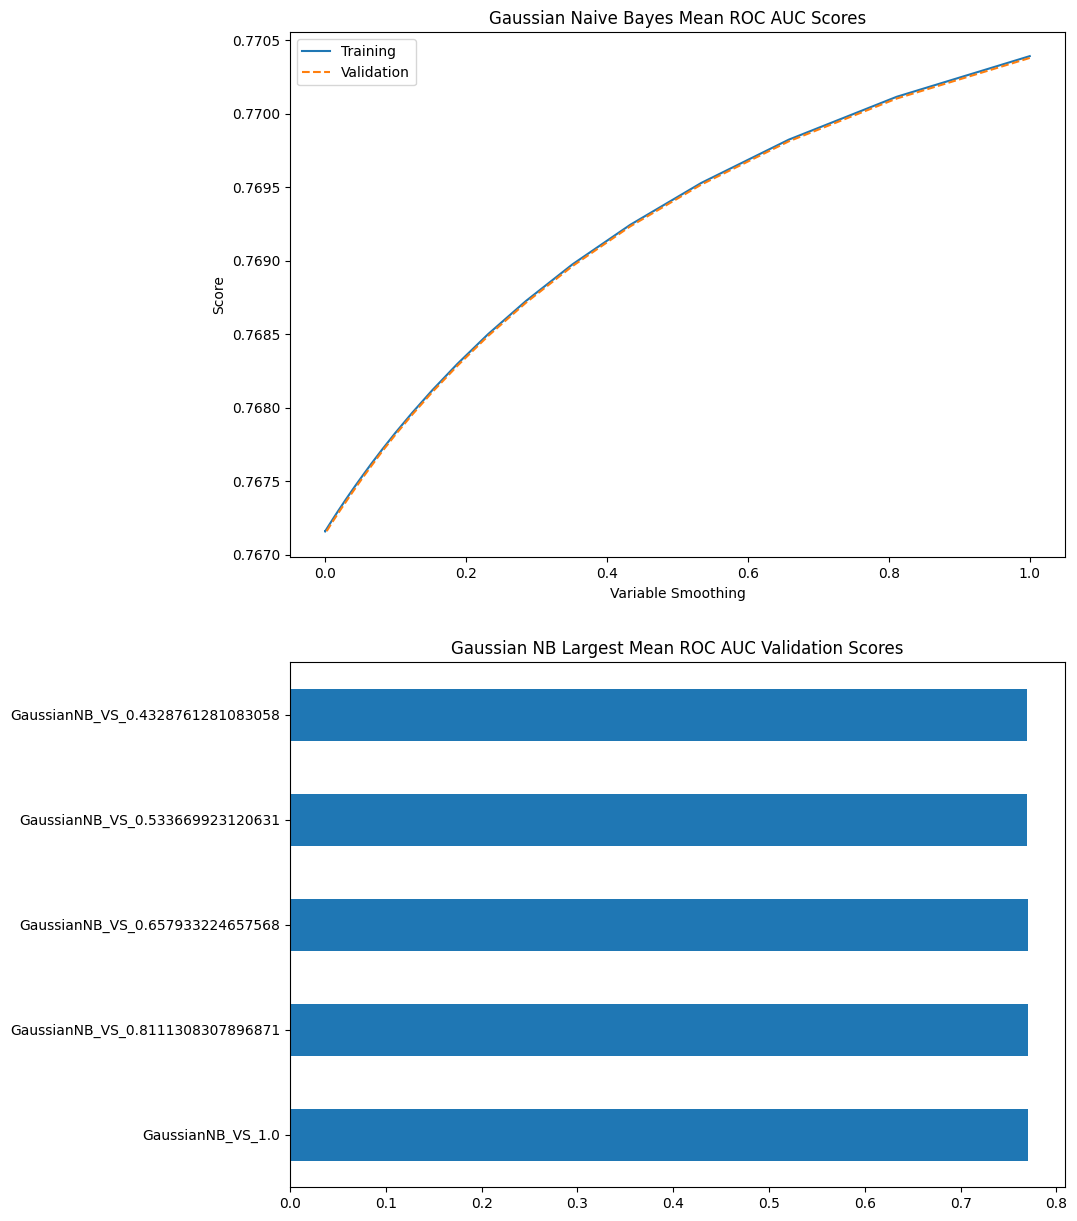

In [25]:
GNBTraining = pd.read_csv("data/Gaussian_NB/Gaussian_Training_Scores.csv")
GNBValidation = pd.read_csv("data/Gaussian_NB/Gaussian_Validation_Scores.csv")
varSmooth = np.logspace(0,-9, num=100)

print('Top Model:'+str(GNBValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(2,figsize = (10,15))
ax[0].plot(varSmooth,GNBTraining.mean(),label='Training')
ax[0].plot(varSmooth,GNBValidation.mean(),label='Validation',linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Variable Smoothing')
ax[0].set_ylabel('Score')
ax[0].set_title('Gaussian Naive Bayes Mean ROC AUC Scores')

GNBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Gaussian NB Largest Mean ROC AUC Validation Scores",ax=ax[1])
plt.show()
#Add Gaussian Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('GaussianNB_VS_1.0',GaussianNB(var_smoothing=1.0)))

Optimize BernoulliNB Through Alpha

In [26]:
%%script echo skipping
BNB = []
a = [.00001,.0001,.001,.01,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,10]

BNBTrainScores,BNBValScores,BNBAccuracyScores,BNBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(a)):
    BNB.append(('BernoulliNB_Alpha_'+str(a[i]), BernoulliNB(alpha=a[i])),)

for (model_name, model) in BNB:
    BNBTrainScores[model_name],BNBValScores[model_name],BNBAccuracyScores[model_name],BNBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#BNBTrainScores.to_csv("data/Bernoulli_NB/Bernoulli_Training_Scores.csv",index= False)
#BNBValScores.to_csv("data/Bernoulli_NB/Bernoulli_Validation_Scores.csv",index= False)
#BNBAccuracyScores.to_csv("data/Bernoulli_NB/Bernoulli_Accuracy_Scores.csv",index= False)
#BNBF1Scores.to_csv("data/Bernoulli_NB/Bernoulli_F1_Scores.csv",index= False)

skipping


Top Model:BernoulliNB_Alpha_0.25    0.760877
dtype: float64


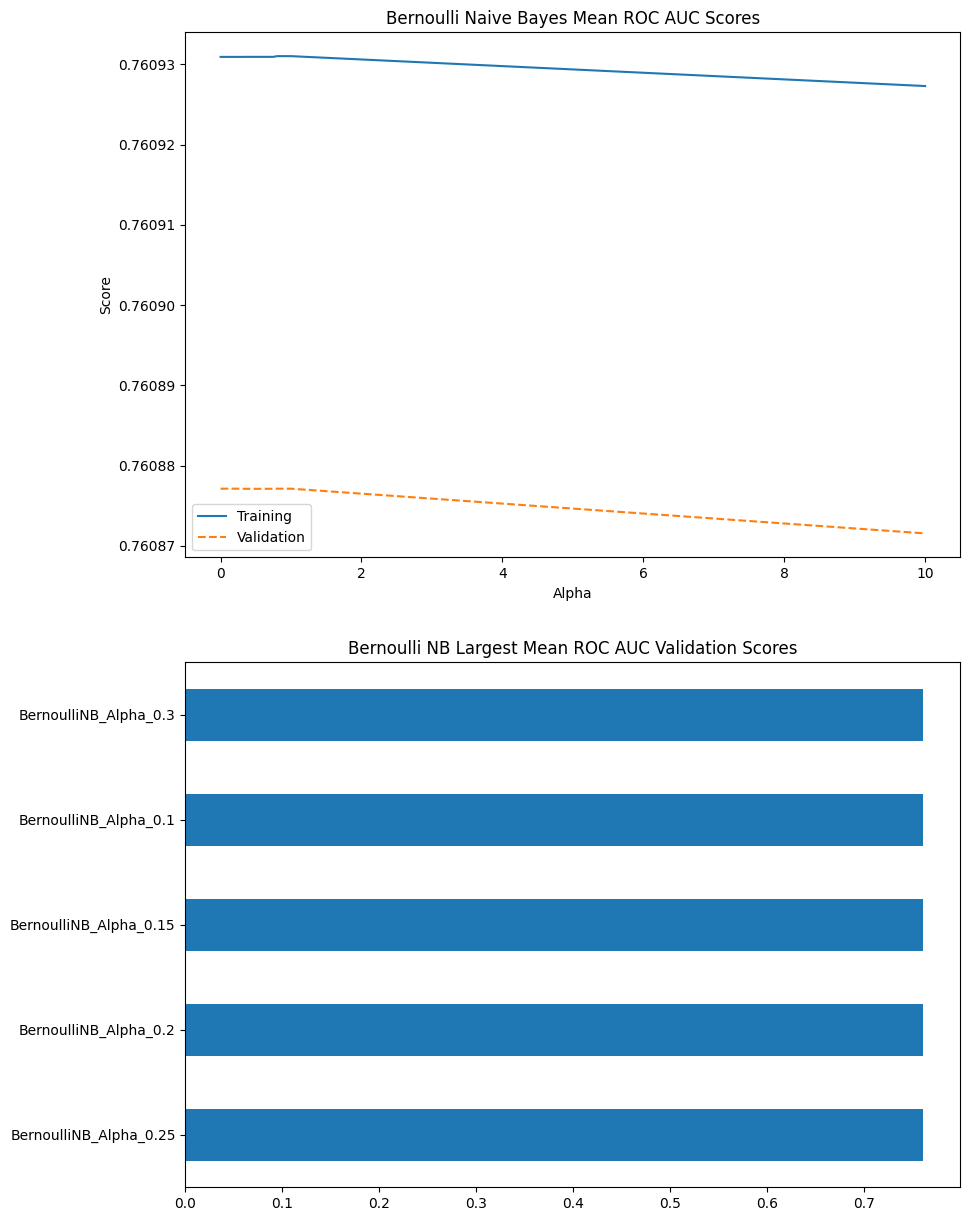

In [27]:
BNBTraining = pd.read_csv("data/Bernoulli_NB/Bernoulli_Training_Scores.csv")
BNBValidation = pd.read_csv("data/Bernoulli_NB/Bernoulli_Validation_Scores.csv")
a = [.00001,.0001,.001,.01,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,10]

print('Top Model:'+str(BNBValidation.mean().sort_values(ascending=False).head(1)))
fig, ax = plt.subplots(2,figsize = (10,15))

ax[0].plot(a,BNBTraining.mean(),label='Training')
ax[0].plot(a,BNBValidation.mean(),label='Validation',linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Score')
ax[0].set_title('Bernoulli Naive Bayes Mean ROC AUC Scores')

BNBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Bernoulli NB Largest Mean ROC AUC Validation Scores",ax=ax[1])
plt.show()

#Add Bernoulli Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('BernoulliNB_Alpha_0.25',BernoulliNB(alpha=0.25)))

Optimize Decision Tree Through Criterion & Max_Depth

In [28]:
%%script echo skipping
criterion =['gini','entropy','log_loss']
depth = [2,3,4,5,6,7,8,9,10,11,12]
DTTrainScores,DTValScores,DTAccuracyScores,DTF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

DT =[]
for i in range(len(criterion)):
    DT.append(('decision_tree_'+str(criterion[i]),DecisionTreeClassifier(random_state=seed,criterion=criterion[i])))
    for j in range(len(depth)):
        DT.append(('decision_tree_'+str(criterion[i])+'_depth_'+str(depth[j]),DecisionTreeClassifier(random_state=seed,criterion=criterion[i],max_depth=depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in DT:
    DTTrainScores[model_name],DTValScores[model_name],DTAccuracyScores[model_name],DTF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)
    
#DTTrainScores.to_csv("data/Decision_Tree/Decision_Tree_Training_Scores.csv",index=False)
#DTValScores.to_csv("data/Decision_Tree/Decision_Tree_Validation_Scores.csv",index=False)
#DTAccuracyScores.to_csv("data/Decision_Tree/Decision_Tree_Accuracy_Scores.csv",index=False)
#DTF1Scores.to_csv("data/Decision_Tree/Decision_Tree_F1_Scores.csv",index=False)

skipping


Top Model:decision_tree_log_loss_depth_6    0.786512
dtype: float64


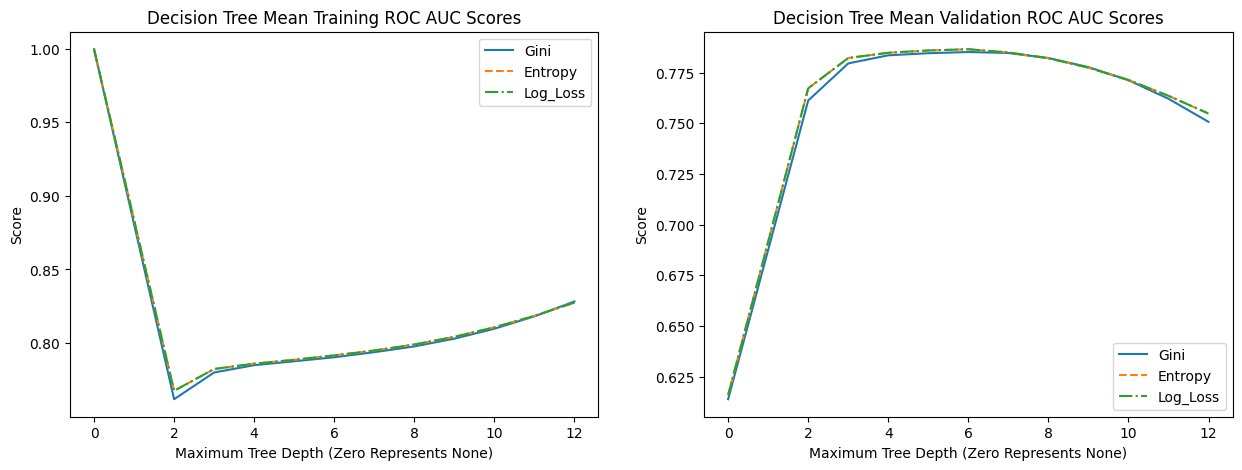

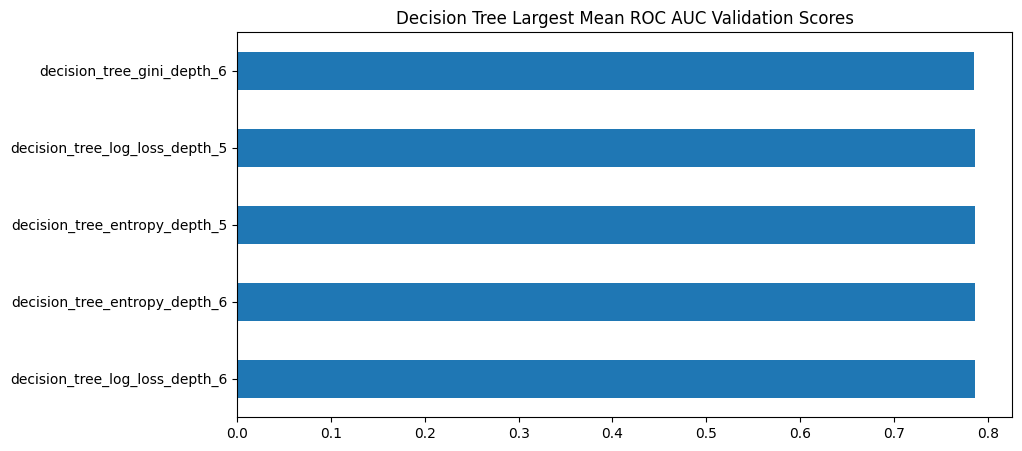

In [29]:
DTTraining = pd.read_csv("data/Decision_Tree/Decision_Tree_Training_Scores.csv")
DTValidation = pd.read_csv("data/Decision_Tree/Decision_Tree_Validation_Scores.csv")
depth = [0,2,3,4,5,6,7,8,9,10,11,12]

print('Top Model:'+str(DTValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(depth,DTTraining.loc[:,'decision_tree_gini':'decision_tree_gini_depth_12'].mean(),label='Gini')
ax[0].plot(depth,DTTraining.loc[:,'decision_tree_entropy':'decision_tree_entropy_depth_12'].mean(),label='Entropy',linestyle='--')
ax[0].plot(depth,DTTraining.loc[:,'decision_tree_log_loss':'decision_tree_log_loss_depth_12'].mean(),label='Log_Loss',linestyle='-.')
ax[0].legend()
ax[0].set_xlabel('Maximum Tree Depth (Zero Represents None)')
ax[0].set_ylabel('Score')
ax[0].set_title('Decision Tree Mean Training ROC AUC Scores')

ax[1].plot(depth,DTValidation.loc[:,'decision_tree_gini':'decision_tree_gini_depth_12'].mean(),label='Gini')
ax[1].plot(depth,DTValidation.loc[:,'decision_tree_entropy':'decision_tree_entropy_depth_12'].mean(),label='Entropy',linestyle='--')
ax[1].plot(depth,DTValidation.loc[:,'decision_tree_log_loss':'decision_tree_log_loss_depth_12'].mean(),label='Log_Loss',linestyle='-.')
ax[1].legend()
ax[1].set_xlabel('Maximum Tree Depth (Zero Represents None)')
ax[1].set_ylabel('Score')
ax[1].set_title('Decision Tree Mean Validation ROC AUC Scores')
plt.show()
DTValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Decision Tree Largest Mean ROC AUC Validation Scores",figsize=(10,5))

#Add Decision Tree Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('decision_tree_log_loss_depth_6',DecisionTreeClassifier(random_state=seed,criterion='log_loss',max_depth=6)))

Optimize KNN Through N_Neighbors

In [30]:
%%script echo skipping
KNN = []
neignbors = range(1,51)

KNNTrainScores,KNNValScores,KNNAccuracyScores,KNNF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(neignbors)):
    KNN.append(('KNN_Neighbors_'+str(neignbors[i]), KNeighborsClassifier(n_neighbors=neignbors[i])),)

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in KNN:
    KNNTrainScores[model_name],KNNValScores[model_name],KNNAccuracyScores[model_name],KNNF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)
    
#KNNTrainScores.to_csv("data/KNeignbors/KNeignbors_Training_Scores.csv",index=False)
#KNNValScores.to_csv("data/KNeignbors/KNeignbors_Validation_Scores.csv",index=False)
#KNNAccuracyScores.to_csv("data/KNeignbors/KNeignbors_Accuracy_Scores.csv",index=False)
#KNNF1Scores.to_csv("data/KNeignbors/KNeignbors_F1_Scores.csv",index=False)

skipping


Top Model:KNN_Neighbors_50    0.778101
dtype: float64


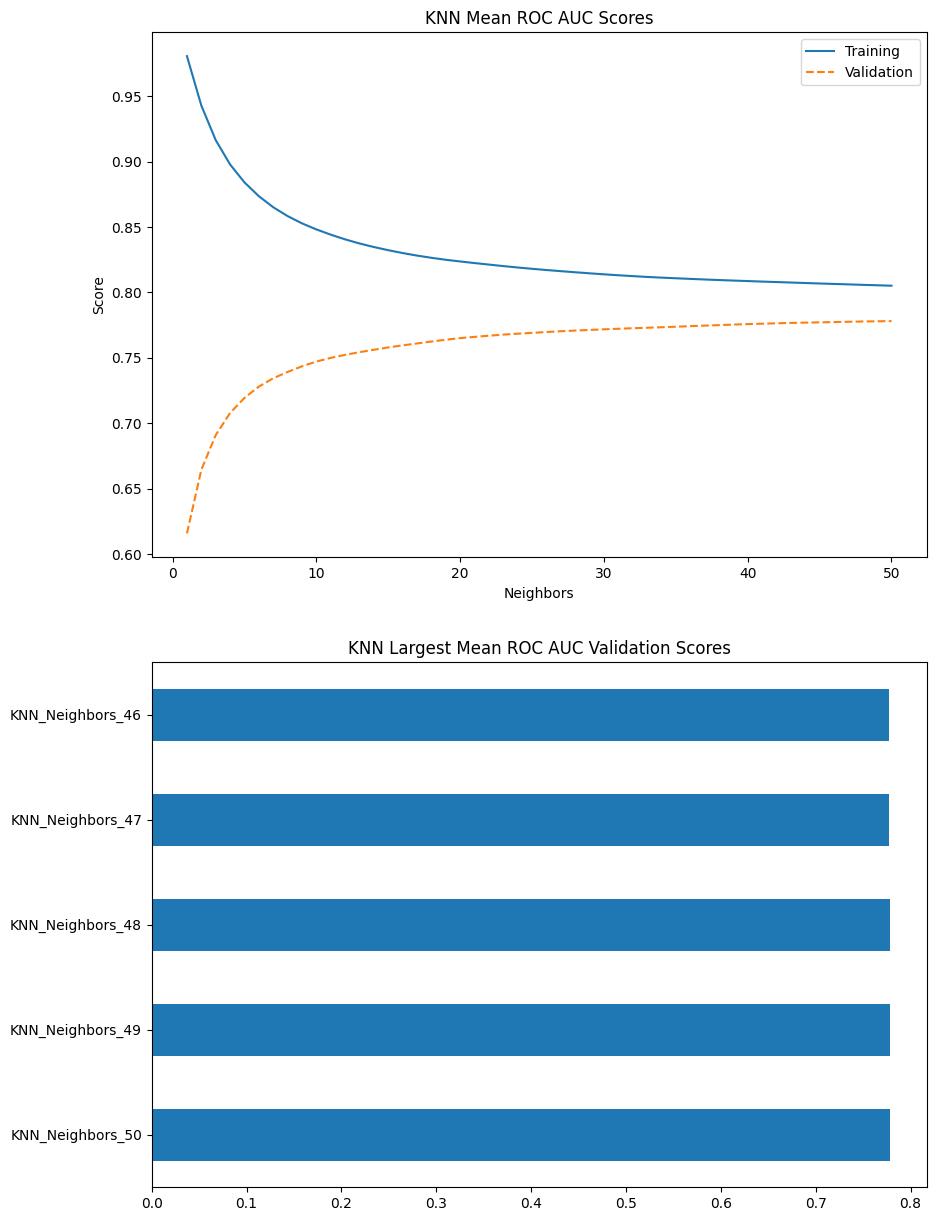

In [31]:
KNNTraining = pd.read_csv("data/KNeignbors/KNeignbors_Training_Scores.csv")
KNNValidation = pd.read_csv("data/KNeignbors/KNeignbors_Validation_Scores.csv")
neignbors = range(1,51)

print('Top Model:'+str(KNNValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(2,1,figsize = (10,15))
ax[0].plot(neignbors,KNNTraining.mean(),label='Training')
ax[0].plot(neignbors,KNNValidation.mean(),label='Validation',linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Neighbors')
ax[0].set_ylabel('Score')
ax[0].set_title('KNN Mean ROC AUC Scores')

KNNValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="KNN Largest Mean ROC AUC Validation Scores",ax=ax[1])
plt.show()

#Add KNN Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('KNN_Neignbors_50',KNeighborsClassifier(n_neighbors=50)))

Optimize Logistic Regression Through Solvers & C

In [32]:
%%script echo skipping
LGR = []
solvers = ['lbfgs', 'newton-cg','liblinear']
c_values = [.00001,.0001,.001,.01, .1, 1.0, 10, 100,1000,10000,100000]

LGRTrainScores,LGRValScores,LGRAccuracyScores,LGRF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for s in range(len(solvers)):
    for c in range(len(c_values)):
        LGR.append(('logistic_regression_solver_'+str(solvers[s])+'_c_'+str(c_values[c]), LogisticRegression(random_state=seed, solver=solvers[s],C=c_values[c]),))
    
for (model_name, model) in LGR:
    LGRTrainScores[model_name],LGRValScores[model_name],LGRAccuracyScores[model_name],LGRF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model),model_name, rskf)
    
#LGRTrainScores.to_csv("data/Logistic_Regression/Logistic_Regression_Training_Scores.csv",index=False)
#LGRValScores.to_csv("data/Logistic_Regression/Logistic_Regression_Validation_Scores.csv",index=False)
#LGRAccuracyScores.to_csv("data/Logistic_Regression/Logistic_Regression_Accuracy_Scores.csv",index=False)
#LGRF1Scores.to_csv("data/Logistic_Regression/Logistic_Regression_F1_Scores.csv",index=False)

skipping


Top Model:logistic_regression_solver_liblinear_c_100    0.778059
dtype: float64


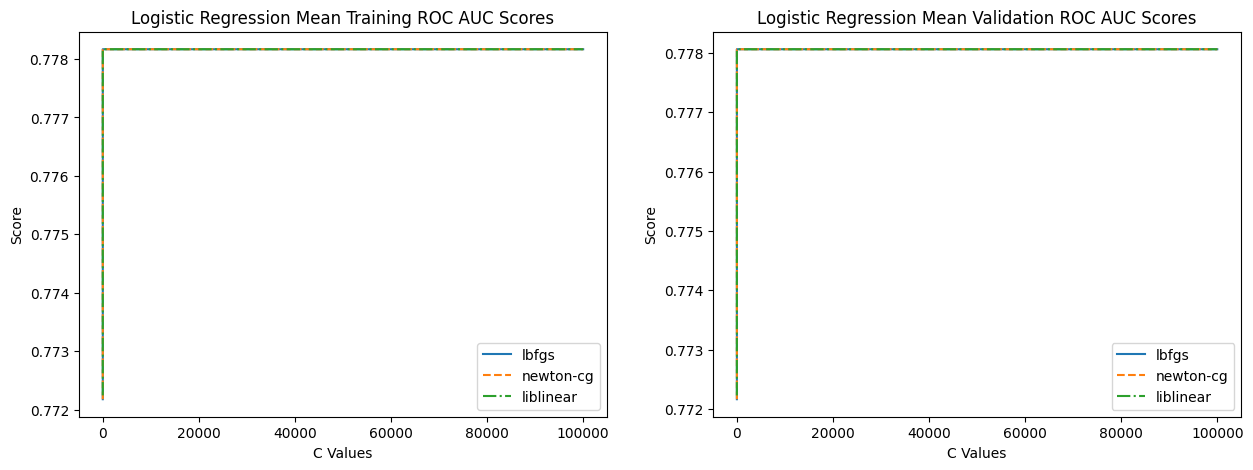

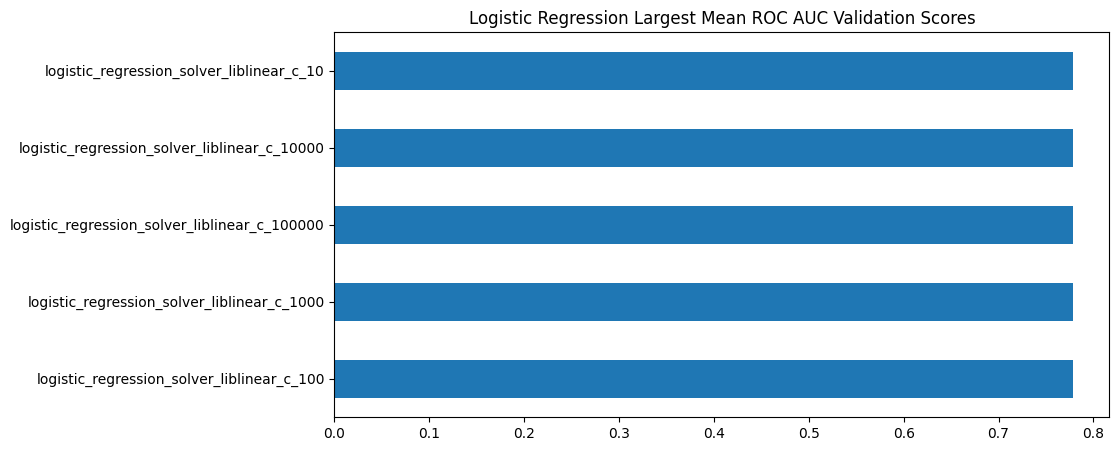

In [33]:
LGRTraining = pd.read_csv("data/Logistic_Regression/Logistic_Regression_Training_Scores.csv")
LGRValidation = pd.read_csv("data/Logistic_Regression/Logistic_Regression_Validation_Scores.csv")
solvers = ['lbfgs', 'newton-cg','liblinear']
c_values = [.00001,.0001,.001,.01, .1, 1.0, 10, 100,1000,10000,100000]

print('Top Model:'+str(LGRValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(c_values,LGRTraining.loc[:,'logistic_regression_solver_lbfgs_c_1e-05':'logistic_regression_solver_lbfgs_c_100000'].mean(),label='lbfgs')
ax[0].plot(c_values,LGRTraining.loc[:,'logistic_regression_solver_newton-cg_c_1e-05':'logistic_regression_solver_newton-cg_c_100000'].mean(),label='newton-cg',linestyle='--')
ax[0].plot(c_values,LGRTraining.loc[:,'logistic_regression_solver_liblinear_c_1e-05':'logistic_regression_solver_liblinear_c_100000'].mean(),label='liblinear',linestyle='-.')
ax[0].legend()
ax[0].set_xlabel('C Values')
ax[0].set_ylabel('Score')
ax[0].set_title('Logistic Regression Mean Training ROC AUC Scores')

ax[1].plot(c_values,LGRValidation.loc[:,'logistic_regression_solver_lbfgs_c_1e-05':'logistic_regression_solver_lbfgs_c_100000'].mean(),label='lbfgs')
ax[1].plot(c_values,LGRValidation.loc[:,'logistic_regression_solver_newton-cg_c_1e-05':'logistic_regression_solver_newton-cg_c_100000'].mean(),label='newton-cg',linestyle='--')
ax[1].plot(c_values,LGRValidation.loc[:,'logistic_regression_solver_liblinear_c_1e-05':'logistic_regression_solver_liblinear_c_100000'].mean(),label='liblinear',linestyle='-.')
ax[1].legend()
ax[1].set_xlabel('C Values')
ax[1].set_ylabel('Score')
ax[1].set_title('Logistic Regression Mean Validation ROC AUC Scores')

plt.show()

LGRValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Logistic Regression Largest Mean ROC AUC Validation Scores", figsize=(10,5))

#Add Logistic Regression Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('logistic_regression_solver_liblinear_c_100',LogisticRegression(random_state=seed, solver='liblinear',C=100)))

Optimize Random Forest Through Max_Depth & Max_Features

In [34]:
%%script echo skipping

RF = [('random_forest_max_features_sqrt',RandomForestClassifier(random_state=seed)),('random_forest_max_features_log2',RandomForestClassifier(random_state=seed,max_features='log2'))]
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
max_features = ['log2', 'sqrt'] # number of features in consideration at every split

RFTrainScores,RFValScores,RFAccuracyScores,RFF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()


for i in range(len(max_depth)):
    for j in range(len(max_features)):
        RF.append(('random_forest_maxDepth_'+str(max_depth[i])+'_maxFeatures_'+max_features[j], RandomForestClassifier(random_state=seed,max_depth=max_depth[i],max_features=max_features[j]),))
    
for (model_name, model) in RF:
    RFTrainScores[model_name],RFValScores[model_name],RFAccuracyScores[model_name],RFF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model),model_name, rskf)
    
#RFTrainScores.to_csv("data/Random_Forest/Random_Forest_Training_Scores.csv",index=False)
#RFValScores.to_csv("data/Random_Forest/Random_Forest_Validation_Scores.csv",index=False)
#RFAccuracyScores.to_csv("data/Random_Forest/Random_Forest_Accuracy_Scores.csv",index=False)
#RFF1Scores.to_csv("data/Random_Forest/Random_Forest_F1_Scores.csv",index=False)

skipping


Future exception was never retrieved
future: <Future finished exception=BrokenPipeError(32, 'Broken pipe')>
Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/unix_events.py", line 676, in write
    n = os.write(self._fileno, data)
BrokenPipeError: [Errno 32] Broken pipe


Top Model:random_forest_maxDepth_10_maxFeatures_sqrt    0.790596
dtype: float64


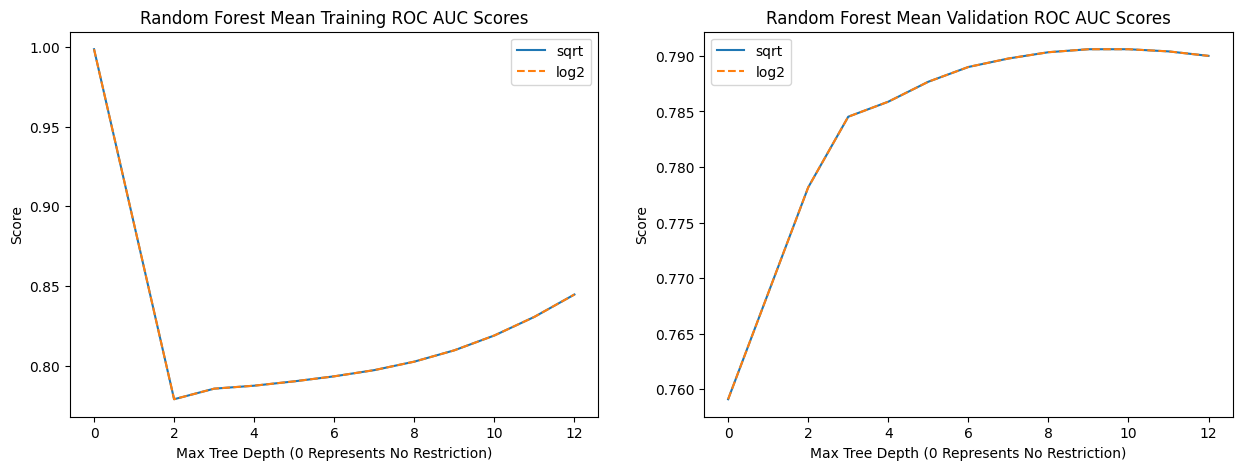

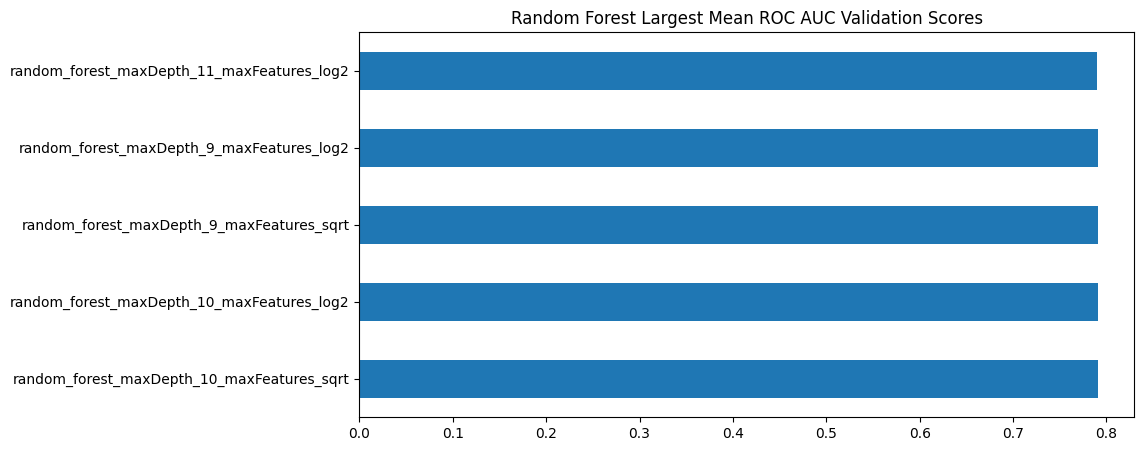

In [35]:
RFTraining = pd.read_csv("data/Random_Forest/Random_Forest_Training_Scores.csv")
RFValidation = pd.read_csv("data/Random_Forest/Random_Forest_Validation_Scores.csv")
max_depth = [0,2,3,4,5,6,7,8,9,10,11,12]
max_features = ['log2', 'sqrt']

print('Top Model:'+str(RFValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(max_depth,RFTraining.loc[:,['random_forest_max_features_sqrt','random_forest_maxDepth_2_maxFeatures_sqrt','random_forest_maxDepth_3_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_4_maxFeatures_sqrt','random_forest_maxDepth_5_maxFeatures_sqrt','random_forest_maxDepth_6_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_7_maxFeatures_sqrt','random_forest_maxDepth_8_maxFeatures_sqrt','random_forest_maxDepth_9_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_10_maxFeatures_sqrt','random_forest_maxDepth_11_maxFeatures_sqrt','random_forest_maxDepth_12_maxFeatures_sqrt']].mean(),label='sqrt')

ax[0].plot(max_depth,RFTraining.loc[: ,['random_forest_max_features_log2',             'random_forest_maxDepth_2_maxFeatures_log2',    'random_forest_maxDepth_3_maxFeatures_log2'
                                    ,'random_forest_maxDepth_4_maxFeatures_log2',   'random_forest_maxDepth_5_maxFeatures_log2',    'random_forest_maxDepth_6_maxFeatures_log2'
                                    ,'random_forest_maxDepth_7_maxFeatures_log2',   'random_forest_maxDepth_8_maxFeatures_log2',    'random_forest_maxDepth_9_maxFeatures_log2'
                                    ,'random_forest_maxDepth_10_maxFeatures_log2',  'random_forest_maxDepth_11_maxFeatures_log2',   'random_forest_maxDepth_12_maxFeatures_log2']].mean(),label='log2',linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Max Tree Depth (0 Represents No Restriction)')
ax[0].set_ylabel('Score')
ax[0].set_title('Random Forest Mean Training ROC AUC Scores')

ax[1].plot(max_depth,RFValidation.loc[:,['random_forest_max_features_sqrt','random_forest_maxDepth_2_maxFeatures_sqrt','random_forest_maxDepth_3_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_4_maxFeatures_sqrt','random_forest_maxDepth_5_maxFeatures_sqrt','random_forest_maxDepth_6_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_7_maxFeatures_sqrt','random_forest_maxDepth_8_maxFeatures_sqrt','random_forest_maxDepth_9_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_10_maxFeatures_sqrt','random_forest_maxDepth_11_maxFeatures_sqrt','random_forest_maxDepth_12_maxFeatures_sqrt']].mean(),label='sqrt')

ax[1].plot(max_depth,RFValidation.loc[: ,['random_forest_max_features_log2',            'random_forest_maxDepth_2_maxFeatures_log2',    'random_forest_maxDepth_3_maxFeatures_log2'
                                        ,'random_forest_maxDepth_4_maxFeatures_log2', 'random_forest_maxDepth_5_maxFeatures_log2',    'random_forest_maxDepth_6_maxFeatures_log2'
                                        ,'random_forest_maxDepth_7_maxFeatures_log2', 'random_forest_maxDepth_8_maxFeatures_log2',    'random_forest_maxDepth_9_maxFeatures_log2'
                                        ,'random_forest_maxDepth_10_maxFeatures_log2','random_forest_maxDepth_11_maxFeatures_log2',   'random_forest_maxDepth_12_maxFeatures_log2']].mean(),label='log2',linestyle='--')
ax[1].legend()
ax[1].set_xlabel('Max Tree Depth (0 Represents No Restriction)')
ax[1].set_ylabel('Score')
ax[1].set_title('Random Forest Mean Validation ROC AUC Scores')
plt.show()

RFValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Random Forest Largest Mean ROC AUC Validation Scores",figsize=(10,5))

#Add Random Forest Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('random_forest_maxDepth_10_maxFeatures_sqrt',RandomForestClassifier(random_state=seed,max_depth=10,max_features='sqrt')))

Optimize Hist Gradient Boosting Through Max_Depth & Learning_Rate

In [36]:
%%script echo skipping

HGB =[('hist_gradient_boosting',HistGradientBoostingClassifier(random_state = seed))]
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)
HGBTrainScores,HGBValScores,HGBAccuracyScores,HGBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        HGB.append(('hist_gradient_boosting_lr_'+str(learning_rate[i])+'_depth_'+str(max_depth[j]),HistGradientBoostingClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in HGB:
    HGBTrainScores[model_name],HGBValScores[model_name],HGBAccuracyScores[model_name],HGBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#HGBTrainScores.to_csv("data/Hist_Gradient/Hist_Gradient_Training_Scores.csv",index=False)
#HGBValScores.to_csv("data/Hist_Gradient/Hist_Gradient_Validation_Scores.csv",index=False)
#HGBAccuracyScores.to_csv("data/Hist_Gradient/Hist_Gradient_Accuracy_Scores.csv",index=False)
#HGBF1Scores.to_csv("data/Hist_Gradient/Hist_Gradient_F1_Scores.csv",index=False)

skipping


Top Model:hist_gradient_boosting_lr_0.04941713361323833_depth_5    0.791031
dtype: float64


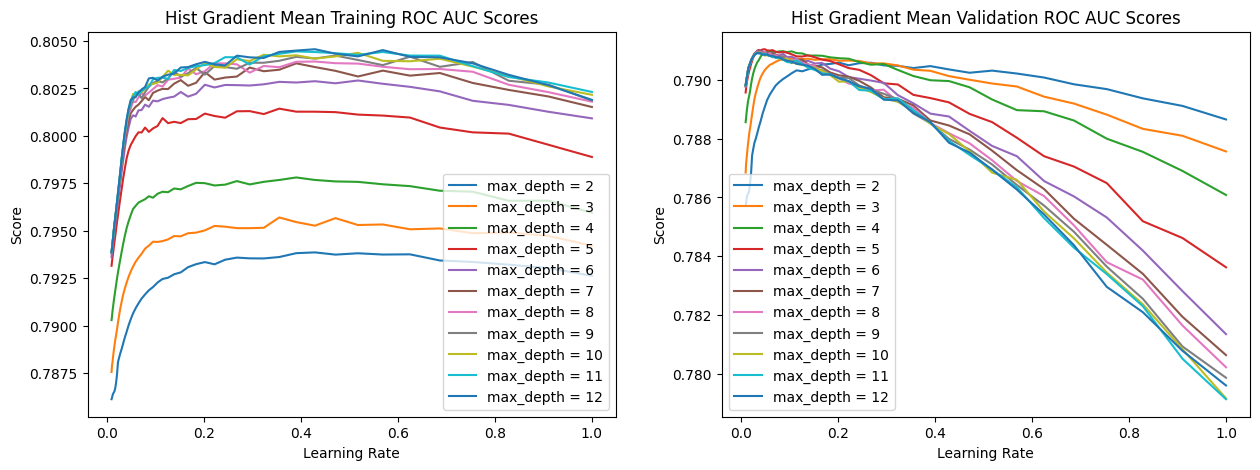

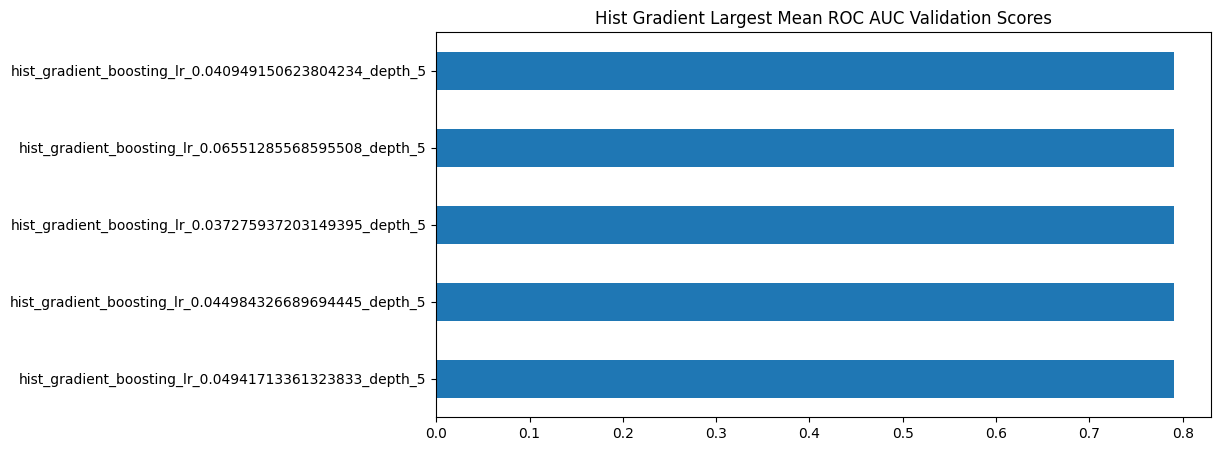

In [37]:
HGBTraining = pd.read_csv("data/Hist_Gradient/Hist_Gradient_Training_Scores.csv")
HGBValidation = pd.read_csv("data/Hist_Gradient/Hist_Gradient_Validation_Scores.csv")
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)

print('Top Model:'+str(HGBValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_2':'hist_gradient_boosting_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_3':'hist_gradient_boosting_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_4':'hist_gradient_boosting_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_5':'hist_gradient_boosting_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_6':'hist_gradient_boosting_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_7':'hist_gradient_boosting_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_8':'hist_gradient_boosting_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_9':'hist_gradient_boosting_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_10':'hist_gradient_boosting_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_11':'hist_gradient_boosting_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
ax[0].plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_12':'hist_gradient_boosting_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
ax[0].legend()
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Score')
ax[0].set_title('Hist Gradient Mean Training ROC AUC Scores')

ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_2':'hist_gradient_boosting_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_3':'hist_gradient_boosting_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_4':'hist_gradient_boosting_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_5':'hist_gradient_boosting_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_6':'hist_gradient_boosting_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_7':'hist_gradient_boosting_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_8':'hist_gradient_boosting_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_9':'hist_gradient_boosting_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_10':'hist_gradient_boosting_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_11':'hist_gradient_boosting_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
ax[1].plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_12':'hist_gradient_boosting_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
ax[1].legend()
ax[1].set_xlabel('Learning Rate')
ax[1].set_ylabel('Score')
ax[1].set_title('Hist Gradient Mean Validation ROC AUC Scores')
plt.show()

HGBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Hist Gradient Largest Mean ROC AUC Validation Scores",figsize=(10,5))

#Add Hist Gradient Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('hist_gradient_boosting_lr_0.04941713361323833_depth_5',HistGradientBoostingClassifier(random_state=seed,learning_rate=0.04941713361323833,max_depth=5)))

Optimize LGBM Through Max_Depth & Num_Leaves

In [38]:
%%script echo skipping

LGBM =[('lgbm',LGBMClassifier(random_state = seed))]
max_depth = [3,4,5,6,7,8,9,10,11,12]

LGBMTrainScores,LGBMValScores,LGBMAccuracyScores,LGBMF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()


for i in range(len(max_depth)):
    leafNum = np.linspace(np.floor( ( (np.power(2,max_depth[i])) )/10 ), ( np.power(2,max_depth[i]) ), 10, dtype=int)
    leafNum = list(filter(lambda x: x>1,leafNum))
    for j in range(len(leafNum)):
        LGBM.append(('lgbm_maxDepth_'+str(max_depth[i])+'_leafNum_'+str(leafNum[j]),LGBMClassifier(random_state = seed,max_depth=max_depth[i],num_leaves=leafNum[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 

for (model_name, model) in LGBM:
    LGBMTrainScores[model_name],LGBMValScores[model_name],LGBMAccuracyScores[model_name],LGBMF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#LGBMTrainScores.to_csv("data/LGBM/LGBM_Training_Scores.csv",index=False)
#LGBMValScores.to_csv("data/LGBM/LGBM_Validation_Scores.csv",index=False)
#LGBMAccuracyScores.to_csv("data/LGBM/LGBM_Accuracy_Scores.csv",index=False)
#LGBMF1Scores.to_csv("data/LGBM/LGBM_F1_Scores.csv",index=False)

skipping


Top Model:lgbm_maxDepth_4_leafNum_14    0.791105
dtype: float64


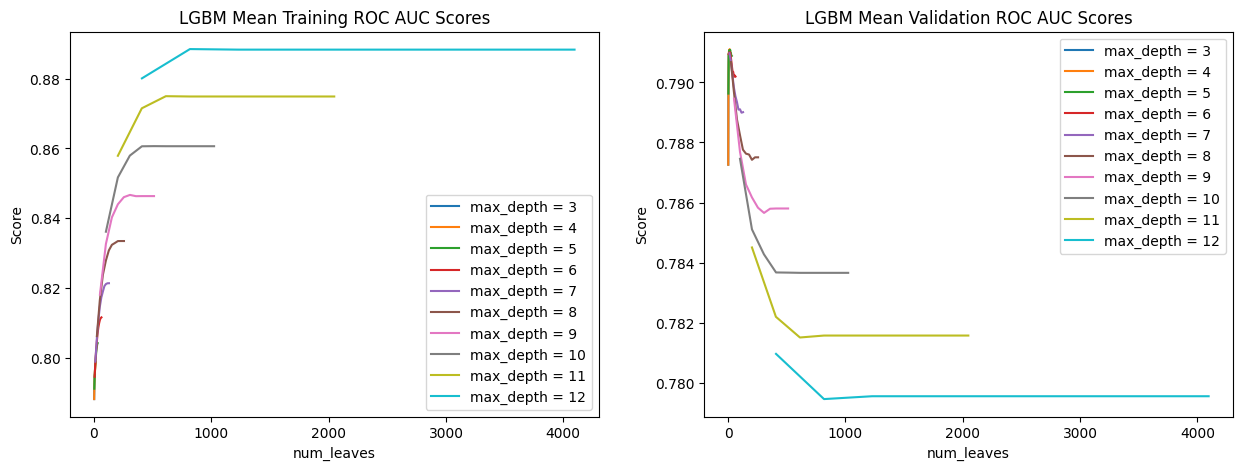

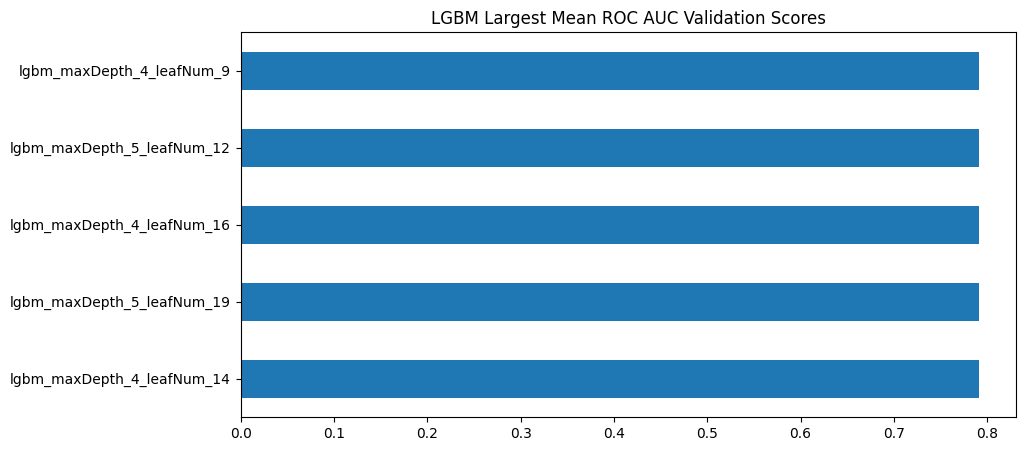

In [39]:
LGBMTraining = pd.read_csv("data/LGBM/LGBM_Training_Scores.csv")
LGBMValidation = pd.read_csv("data/LGBM/LGBM_Validation_Scores.csv")
max_depth = [3,4,5,6,7,8,9,10,11,12]

#Define the Leaf Numbers Used for Each Depth
leafNum = []
for i in range(len(max_depth)):
    temp = np.linspace(np.floor( ( (np.power(2,max_depth[i])) )/10 ), ( np.power(2,max_depth[i]) ), 10, dtype=int)
    leafNum.append(list(filter(lambda x: x>1,temp)))

print('Top Model:'+str(LGBMValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(leafNum[0],LGBMTraining.loc[:,'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][0]):'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][len(leafNum[0])-1])].mean(),label='max_depth = 3')
ax[0].plot(leafNum[1],LGBMTraining.loc[:,'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][0]):'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][ len(leafNum[1])-1])].mean(),label='max_depth = 4')
ax[0].plot(leafNum[2],LGBMTraining.loc[:,'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][0]):'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][9])].mean(),label='max_depth = 5')
ax[0].plot(leafNum[3],LGBMTraining.loc[:,'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][0]):'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][9])].mean(),label='max_depth = 6')
ax[0].plot(leafNum[4],LGBMTraining.loc[:,'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][0]):'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][9])].mean(),label='max_depth = 7')
ax[0].plot(leafNum[5],LGBMTraining.loc[:,'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][0]):'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][9])].mean(),label='max_depth = 8')
ax[0].plot(leafNum[6],LGBMTraining.loc[:,'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][0]):'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][9])].mean(),label='max_depth = 9')
ax[0].plot(leafNum[7],LGBMTraining.loc[:,'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][0]):'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][9])].mean(),label='max_depth = 10')
ax[0].plot(leafNum[8],LGBMTraining.loc[:,'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][0]):'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][9])].mean(),label='max_depth = 11')
ax[0].plot(leafNum[9],LGBMTraining.loc[:,'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][0]):'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][9])].mean(),label='max_depth = 12')
ax[0].legend()
ax[0].set_xlabel('num_leaves')
ax[0].set_ylabel('Score')
ax[0].set_title('LGBM Mean Training ROC AUC Scores')

ax[1].plot(leafNum[0],LGBMValidation.loc[:,'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][0]):'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][len(leafNum[0])-1])].mean(),label='max_depth = 3')
ax[1].plot(leafNum[1],LGBMValidation.loc[:,'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][0]):'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][ len(leafNum[1])-1])].mean(),label='max_depth = 4')
ax[1].plot(leafNum[2],LGBMValidation.loc[:,'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][0]):'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][9])].mean(),label='max_depth = 5')
ax[1].plot(leafNum[3],LGBMValidation.loc[:,'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][0]):'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][9])].mean(),label='max_depth = 6')
ax[1].plot(leafNum[4],LGBMValidation.loc[:,'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][0]):'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][9])].mean(),label='max_depth = 7')
ax[1].plot(leafNum[5],LGBMValidation.loc[:,'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][0]):'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][9])].mean(),label='max_depth = 8')
ax[1].plot(leafNum[6],LGBMValidation.loc[:,'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][0]):'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][9])].mean(),label='max_depth = 9')
ax[1].plot(leafNum[7],LGBMValidation.loc[:,'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][0]):'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][9])].mean(),label='max_depth = 10')
ax[1].plot(leafNum[8],LGBMValidation.loc[:,'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][0]):'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][9])].mean(),label='max_depth = 11')
ax[1].plot(leafNum[9],LGBMValidation.loc[:,'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][0]):'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][9])].mean(),label='max_depth = 12')
ax[1].legend()
ax[1].set_xlabel('num_leaves')
ax[1].set_ylabel('Score')
ax[1].set_title('LGBM Mean Validation ROC AUC Scores')
plt.show()

LGBMValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="LGBM Largest Mean ROC AUC Validation Scores",figsize=(10,5))

#Add LGBM Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('lgbm_maxDepth_4_leafNum_14',LGBMClassifier(random_state=seed,max_depth=4,num_leaves=14)))

Optimize Gradient Boosting Through Max_Depth & Learning_Rate

In [40]:
%%script echo skipping
GB =[]
max_depth = [3,4,5,6,7,8,9,10]
learning_rate = [.01,.04,.07,.1,.13,.16,.19,.21]
GBTrainScores,GBValScores,GBAccuracyScores,GBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        GB.append(('gradient_boosting_lr_'+str(learning_rate[i])+'_depth_'+str(max_depth[j]),GradientBoostingClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in GB:
    GBTrainScores[model_name],GBValScores[model_name],GBAccuracyScores[model_name],GBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#GBTrainScores.to_csv("data/Gradient/Gradient_Training_Scores.csv",index=False)
#GBValScores.to_csv("data/Gradient/Gradient_Validation_Scores.csv",index=False)
#GBAccuracyScores.to_csv("data/Gradient/Gradient_Accuracy_Scores.csv",index=False)
#GBF1Scores.to_csv("data/Gradient/Gradient_F1_Scores.csv",index=False)

skipping


Top Model:gradient_boosting_lr_0.07_depth_5    0.790967
dtype: float64


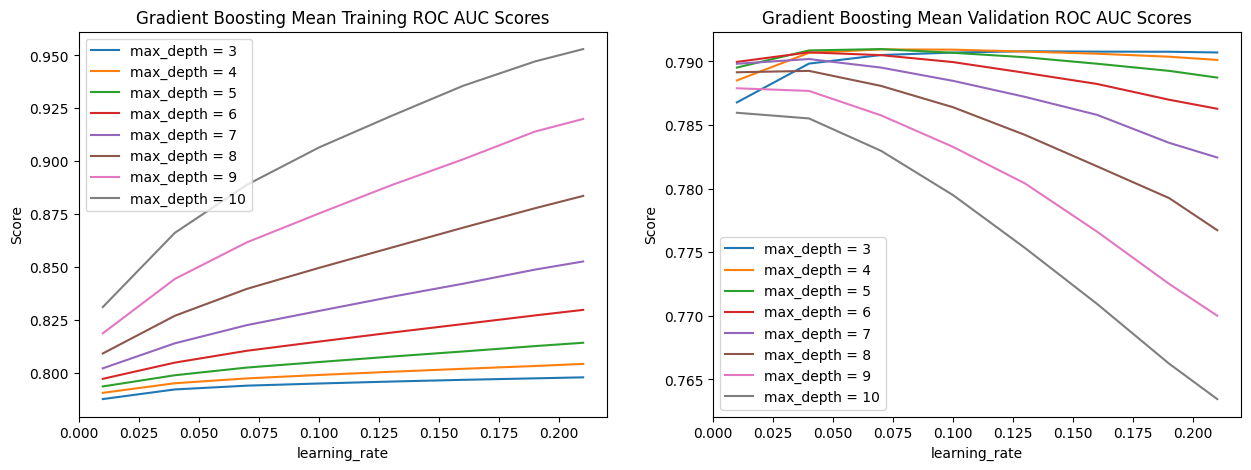

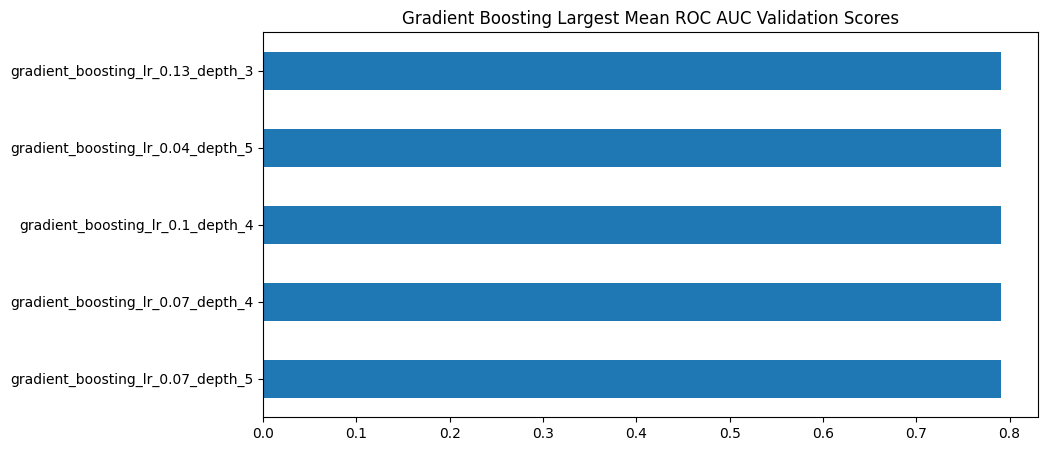

In [41]:
GBTraining = pd.read_csv("data/Gradient/Gradient_Training_Scores.csv")
GBValidation = pd.read_csv("data/Gradient/Gradient_Validation_Scores.csv")
max_depth = [3,4,5,6,7,8,9,10]
learning_rate = [.01,.04,.07,.1,.13,.16,.19,.21]

print('Top Model:'+str(GBValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_3':'gradient_boosting_lr_0.21_depth_3':8].mean(),label='max_depth = 3')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_4':'gradient_boosting_lr_0.21_depth_4':8].mean(),label='max_depth = 4')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_5':'gradient_boosting_lr_0.21_depth_5':8].mean(),label='max_depth = 5')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_6':'gradient_boosting_lr_0.21_depth_6':8].mean(),label='max_depth = 6')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_7':'gradient_boosting_lr_0.21_depth_7':8].mean(),label='max_depth = 7')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_8':'gradient_boosting_lr_0.21_depth_8':8].mean(),label='max_depth = 8')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_9':'gradient_boosting_lr_0.21_depth_9':8].mean(),label='max_depth = 9')
ax[0].plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_10':'gradient_boosting_lr_0.21_depth_10':8].mean(),label='max_depth = 10')
ax[0].legend()
ax[0].set_xlabel('learning_rate')
ax[0].set_ylabel('Score')
ax[0].set_title('Gradient Boosting Mean Training ROC AUC Scores')

ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_3':'gradient_boosting_lr_0.21_depth_3':8].mean(),label='max_depth = 3')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_4':'gradient_boosting_lr_0.21_depth_4':8].mean(),label='max_depth = 4')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_5':'gradient_boosting_lr_0.21_depth_5':8].mean(),label='max_depth = 5')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_6':'gradient_boosting_lr_0.21_depth_6':8].mean(),label='max_depth = 6')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_7':'gradient_boosting_lr_0.21_depth_7':8].mean(),label='max_depth = 7')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_8':'gradient_boosting_lr_0.21_depth_8':8].mean(),label='max_depth = 8')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_9':'gradient_boosting_lr_0.21_depth_9':8].mean(),label='max_depth = 9')
ax[1].plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_10':'gradient_boosting_lr_0.21_depth_10':8].mean(),label='max_depth = 10')
ax[1].legend()
ax[1].set_xlabel('learning_rate')
ax[1].set_ylabel('Score')
ax[1].set_title('Gradient Boosting Mean Validation ROC AUC Scores')
plt.show()

GBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Gradient Boosting Largest Mean ROC AUC Validation Scores",figsize=(10,5))

#Add Gradient Boosting Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('gradient_boosting_lr_0.07_depth_5',GradientBoostingClassifier(random_state=seed,learning_rate=0.07,max_depth=5)))

Optimize XGB Through Max_Depth & Learning_Rate

In [42]:
%%script echo skipping

XGB =[('XGBoost',XGBClassifier(random_state = seed))]
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)

XGBTrainScores,XGBValScores,XGBAccuracyScores,XGBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        XGB.append(('XGBoost_lr_'+str(learning_rate[i])+'_depth_'+str(max_depth[j]),XGBClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in XGB:
    XGBTrainScores[model_name],XGBValScores[model_name],XGBAccuracyScores[model_name],XGBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#XGBTrainScores.to_csv("data/XGBoost/XGBoost_Training_Scores.csv",index=False)
#XGBValScores.to_csv("data/XGBoost/XGBoost_Validation_Scores.csv",index=False)
#XGBAccuracyScores.to_csv("data/XGBoost/XGBoost_Accuracy_Scores.csv",index=False)
#XGBF1Scores.to_csv("data/XGBoost/XGBoost_F1_Scores.csv",index=False)

skipping


Top Model:XGBoost_lr_0.04941713361323833_depth_5    0.791193
dtype: float64


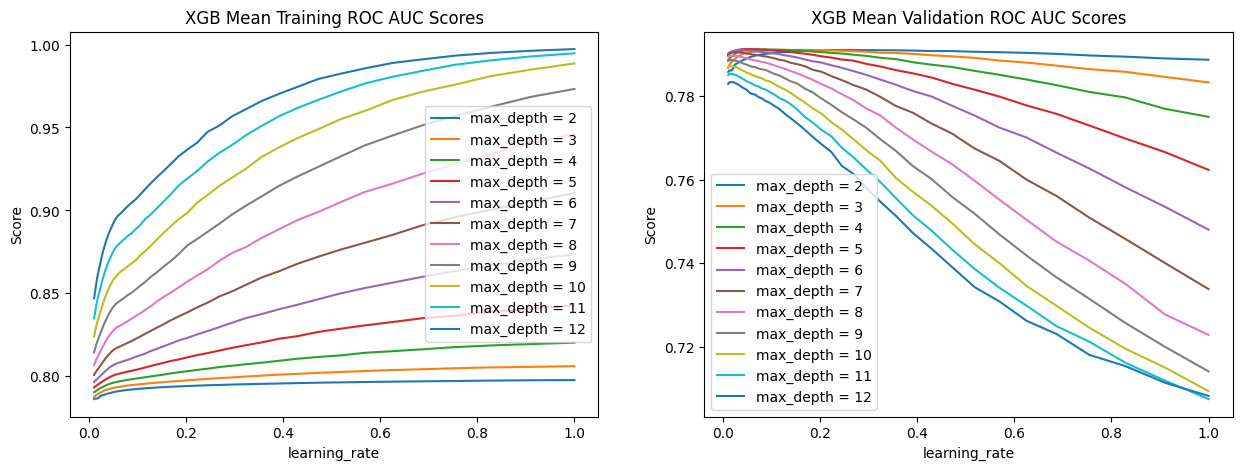

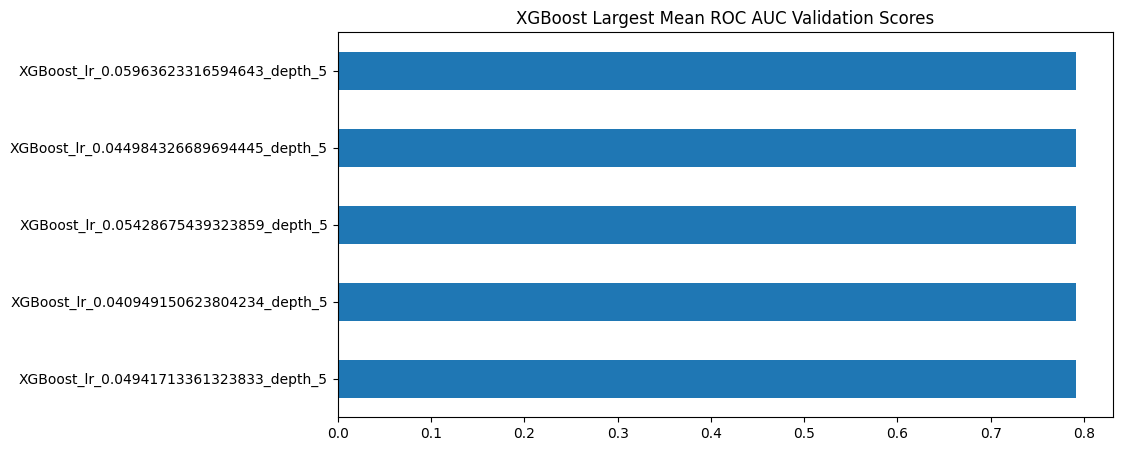

In [43]:
XGBTraining = pd.read_csv("data/XGBoost/XGBoost_Training_Scores.csv")
XGBValidation = pd.read_csv("data/XGBoost/XGBoost_Validation_Scores.csv")
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)

print('Top Model:'+str(XGBValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_2':'XGBoost_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_3':'XGBoost_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_4':'XGBoost_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_5':'XGBoost_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_6':'XGBoost_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_7':'XGBoost_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_8':'XGBoost_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_9':'XGBoost_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_10':'XGBoost_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_11':'XGBoost_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
ax[0].plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_12':'XGBoost_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
ax[0].legend()
ax[0].set_xlabel('learning_rate')
ax[0].set_ylabel('Score')
ax[0].set_title('XGB Mean Training ROC AUC Scores')

ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_2':'XGBoost_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_3':'XGBoost_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_4':'XGBoost_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_5':'XGBoost_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_6':'XGBoost_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_7':'XGBoost_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_8':'XGBoost_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_9':'XGBoost_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_10':'XGBoost_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_11':'XGBoost_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
ax[1].plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_12':'XGBoost_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
ax[1].legend()
ax[1].set_xlabel('learning_rate')
ax[1].set_ylabel('Score')
ax[1].set_title('XGB Mean Validation ROC AUC Scores')
plt.show()

XGBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="XGBoost Largest Mean ROC AUC Validation Scores",figsize=(10,5))

#Add XGBoost Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('XGBoost_lr_0.04941713361323833_depth_5',XGBClassifier(random_state=seed,learning_rate=0.04941713361323833,max_depth=5)))

Optimize Cat Boost Optimization Through Max_Depth

In [44]:
%%script echo skipping
CB =[('CatBoost',CatBoostClassifier(random_state = seed, verbose=0))]
max_depth = [3,4,5,6,7,8,9,10,11,12]

CBTrainScores,CBValScores,CBAccuracyScores,CBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(max_depth)):
    CB.append(('CatBoost_depth_'+str(max_depth[i]),CatBoostClassifier(random_state = seed, verbose=0,max_depth=max_depth[i])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in CB:
    CBTrainScores[model_name],CBValScores[model_name],CBAccuracyScores[model_name],CBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

CBTrainScores.to_csv("data/CatBoost/CatBoost_Training_Scores.csv",index=False)
CBValScores.to_csv("data/CatBoost/CatBoost_Validation_Scores.csv",index=False)
CBAccuracyScores.to_csv("data/CatBoost/CatBoost_Accuracy_Scores.csv",index=False)
CBF1Scores.to_csv("data/CatBoost/CatBoost_F1_Scores.csv",index=False)

skipping


Top Model:CatBoost_depth_3    0.791019
dtype: float64


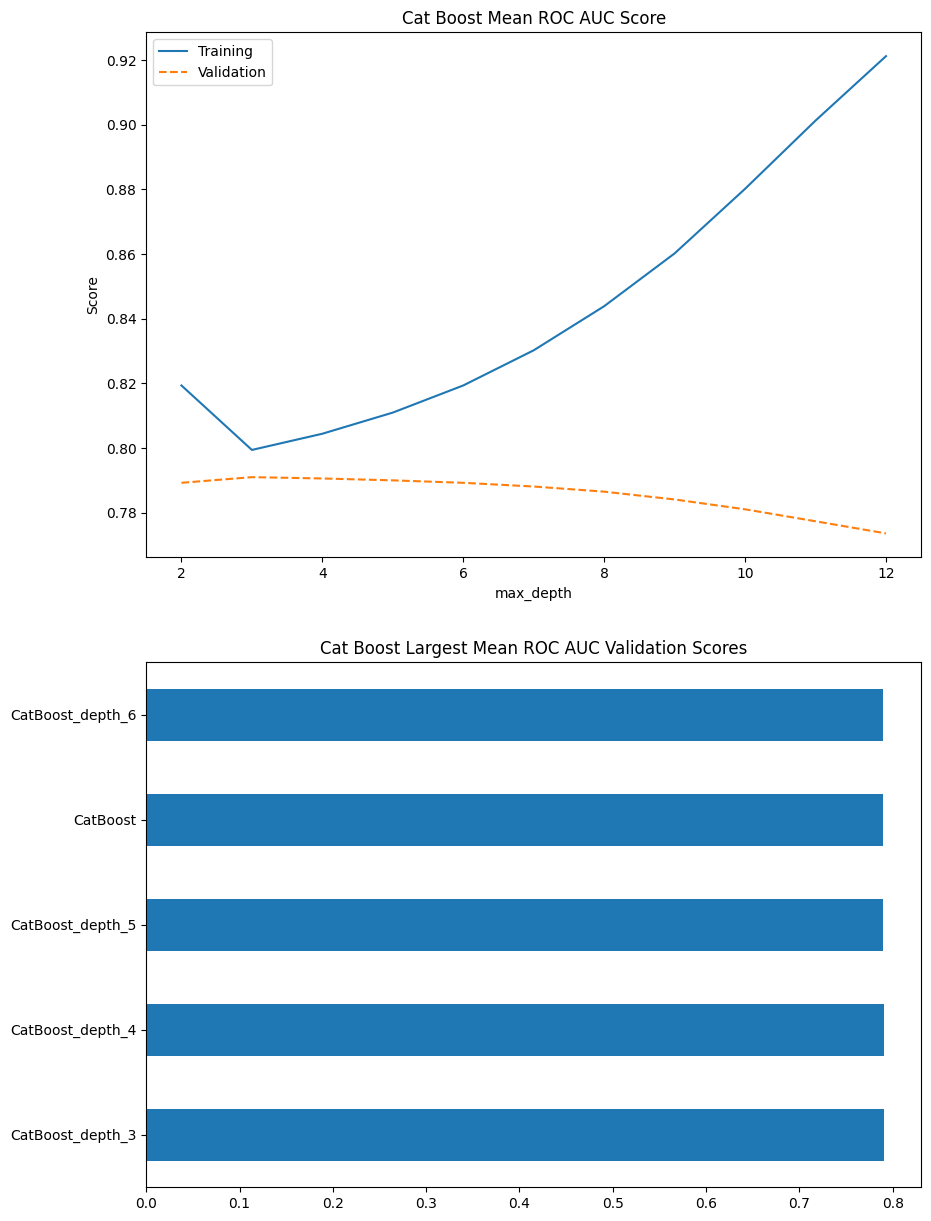

In [45]:
CBTraining = pd.read_csv("data/CatBoost/CatBoost_Training_Scores.csv")
CBValidation = pd.read_csv("data/CatBoost/CatBoost_Validation_Scores.csv")
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = [.01,.04,.07,.1,.13,.16,.19,.21,.24,.27,.3]

print('Top Model:'+str(CBValidation.mean().sort_values(ascending=False).head(1)))

fig, ax = plt.subplots(2,figsize = (10,15))
ax[0].plot(max_depth,CBTraining.mean(),label='Training')
ax[0].plot(max_depth,CBValidation.mean(),label='Validation',linestyle='--')
ax[0].legend()
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Score')
ax[0].set_title('Cat Boost Mean ROC AUC Score')

CBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Cat Boost Largest Mean ROC AUC Validation Scores",ax=ax[1])
plt.show()

#Add Cat Boost Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('CatBoost_depth_3',CatBoostClassifier(random_state=seed,verbose=0,max_depth=3)))

In [46]:
%%script echo skipping

OptTrainScores, OptValScores,OptAccuracyScores,OptF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for (model_name, model) in optimalModel:
    OptTrainScores[model_name],OptValScores[model_name],OptAccuracyScores[model_name],OptF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

OptTrainScores.to_csv("data/Opt/Opt_Training_Scores.csv",index=False)
OptValScores.to_csv("data/Opt/Opt_Validation_Scores.csv",index=False)
OptAccuracyScores.to_csv("data/Opt/Opt_Accuracy_Scores.csv",index=False)
OptF1Scores.to_csv("data/Opt/Opt_F1_Scores.csv",index=False)

skipping


Training Score: 0.7703925	Validation Score: 0.7703802	Accuracy: 0.7925759	F1 Score: 0.2587808	Model: GaussianNB_VS_1.0
Training Score: 0.7609309	Validation Score: 0.7608771	Accuracy: 0.7692737	F1 Score: 0.5317257	Model: BernoulliNB_Alpha_0.25
Training Score: 0.7916948	Validation Score: 0.7865117	Accuracy: 0.8135423	F1 Score: 0.4824395	Model: decision_tree_log_loss_depth_6
Training Score: 0.8051304	Validation Score: 0.7781011	Accuracy: 0.8117106	F1 Score: 0.4686465	Model: KNN_Neignbors_50
Training Score: 0.7781662	Validation Score: 0.7780591	Accuracy: 0.80675	F1 Score: 0.3712207	Model: logistic_regression_solver_liblinear_c_100
Training Score: 0.8188424	Validation Score: 0.790596	Accuracy: 0.8148463	F1 Score: 0.4876912	Model: random_forest_maxDepth_10_maxFeatures_sqrt
Training Score: 0.7995138	Validation Score: 0.7910308	Accuracy: 0.8148699	F1 Score: 0.4870412	Model: hist_gradient_boosting_lr_0.04941713361323833_depth_5
Training Score: 0.7983258	Validation Score: 0.7911049	Accuracy: 0.8

<Axes: title={'center': "Optimized Models' Mean F1 Scores"}>

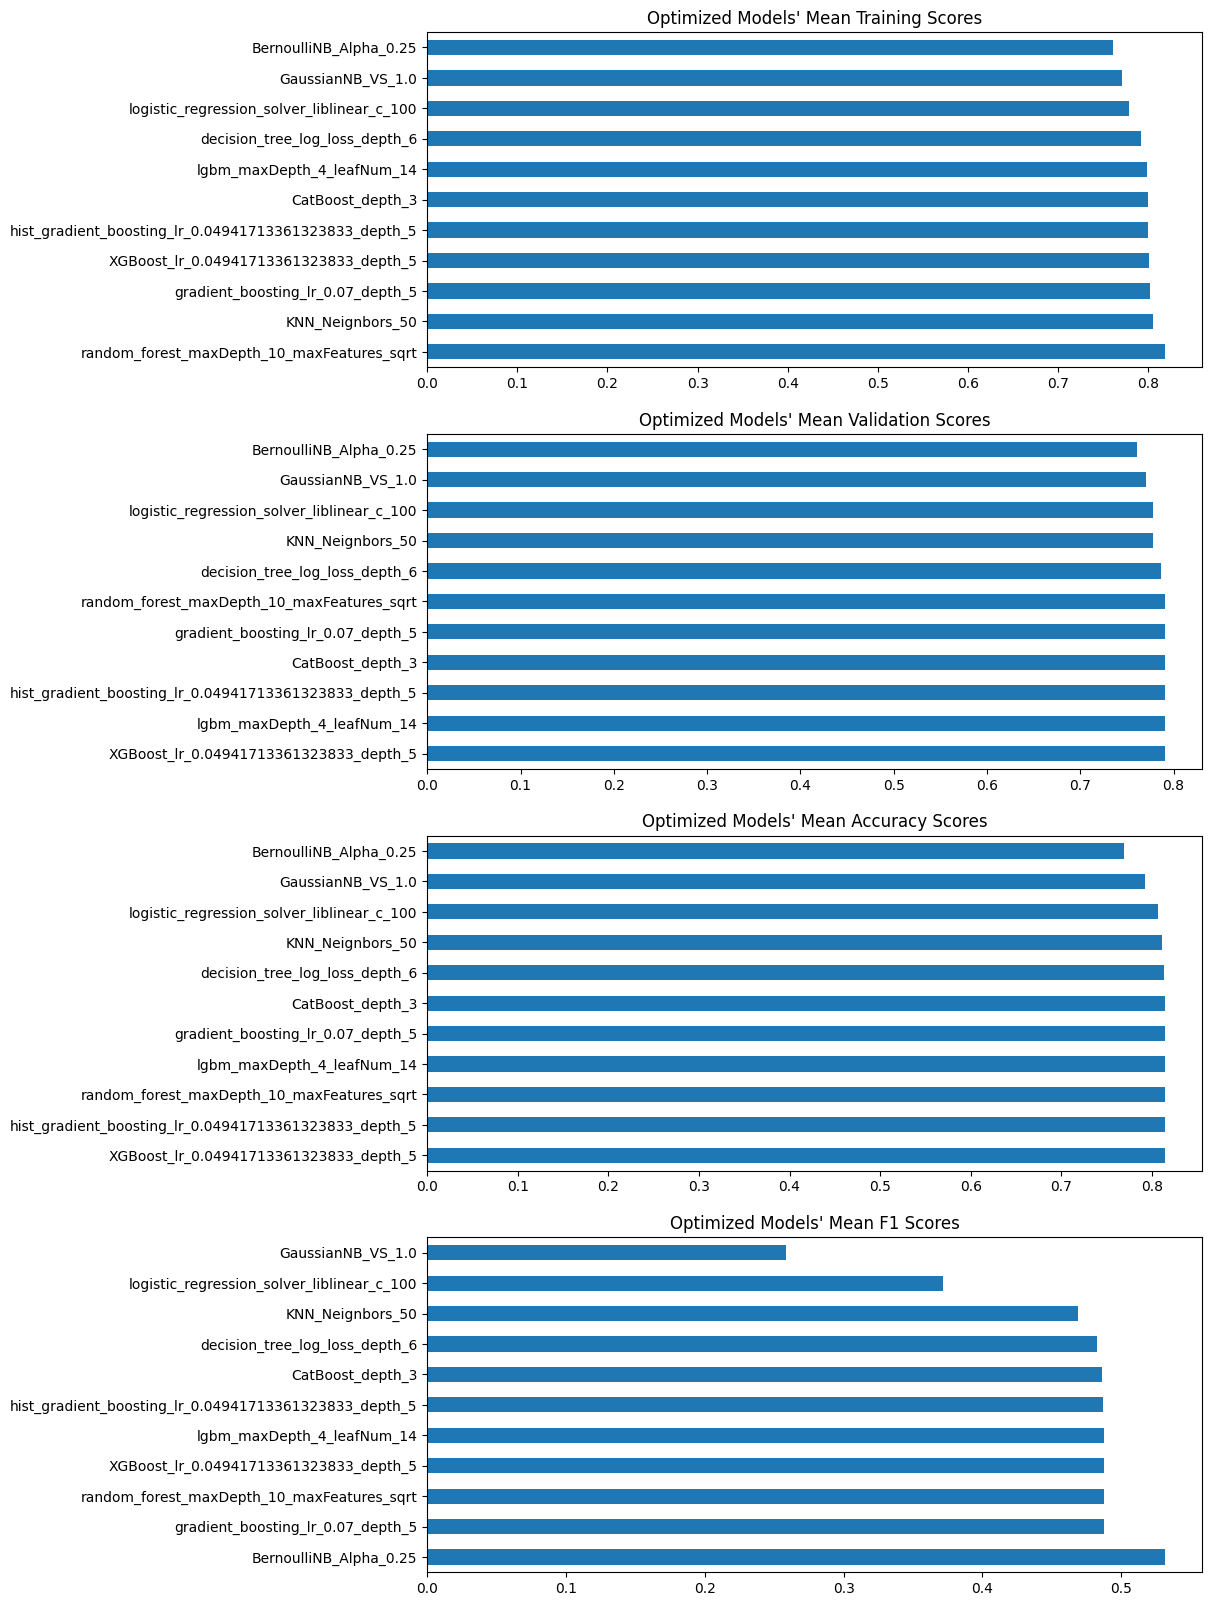

In [47]:
#Plot the Mean of the Validation Scores for Each Model 
OptTrain = pd.read_csv("data/Opt/Opt_Training_Scores.csv")
OptValidation = pd.read_csv("data/Opt/Opt_Validation_Scores.csv")
OptAccuracy = pd.read_csv("data/Opt/Opt_Accuracy_Scores.csv")
OptF1 = pd.read_csv("data/Opt/Opt_F1_Scores.csv")
OptModelName = [i[0] for i in optimalModel]

for i in range(11):
    print(f"Training Score: {np.round(np.mean(OptTrain.mean()[i]),decimals=7)}\tValidation Score: {np.round(np.mean(OptValidation.mean()[i]),decimals=7)}\tAccuracy: {np.round(np.mean(OptAccuracy.mean()[i]),decimals=7)}\tF1 Score: {np.round(np.mean(OptF1.mean()[i]),decimals=7)}\tModel: {OptModelName[i]}")

fig, ax = plt.subplots(4,figsize = (10,20))
OptTrain.mean().sort_values(ascending=False).plot(kind="barh",title="Optimized Models' Mean Training Scores",ax=ax[0])
OptValidation.mean().sort_values(ascending=False).plot(kind="barh",title="Optimized Models' Mean Validation Scores",ax=ax[1])
OptAccuracy.mean().sort_values(ascending=False).plot(kind="barh",title="Optimized Models' Mean Accuracy Scores",ax=ax[2])
OptF1.mean().sort_values(ascending=False).plot(kind="barh",title="Optimized Models' Mean F1 Scores",ax=ax[3])

In [48]:
GNBModel = GaussianNB(var_smoothing=1.0)
BNBModel = BernoulliNB(alpha=0.25)
DTModel = DecisionTreeClassifier(random_state=seed,criterion='log_loss',max_depth=6)
KNNModel = KNeighborsClassifier(n_neighbors=50)
LGRModel = LogisticRegression(random_state=seed, solver='liblinear',C=100)
RFModel = RandomForestClassifier(random_state=seed,max_depth=10,max_features='sqrt')
HGBModel = HistGradientBoostingClassifier(random_state=seed,learning_rate=0.04941713361323833,max_depth=5)
LGBMModel = LGBMClassifier(random_state=seed,max_depth=4,num_leaves=14)
GBModel = GradientBoostingClassifier(random_state=seed,learning_rate=0.07,max_depth=5)
XGBModel = XGBClassifier(random_state=seed,learning_rate=0.04941713361323833,max_depth=5)
CBModel = CatBoostClassifier(random_state=seed,verbose=0,max_depth=3)

GNBModel.fit(X_train,y_train)
BNBModel.fit(X_train,y_train)
DTModel.fit(X_train,y_train)
KNNModel.fit(X_train,y_train)
LGRModel.fit(X_train,y_train)
RFModel.fit(X_train,y_train)
HGBModel.fit(X_train,y_train)
LGBMModel.fit(X_train,y_train)
GBModel.fit(X_train,y_train)
XGBModel.fit(X_train,y_train)
CBModel.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 23064, number of negative: 78699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 101763, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226644 -> initscore=-1.227357
[LightGBM] [Info] Start training from score -1.227357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Model Prediction Probability Distribution

Text(0.5, 1.0, "Cat Boosting's Distribution of Defect Probabilities")

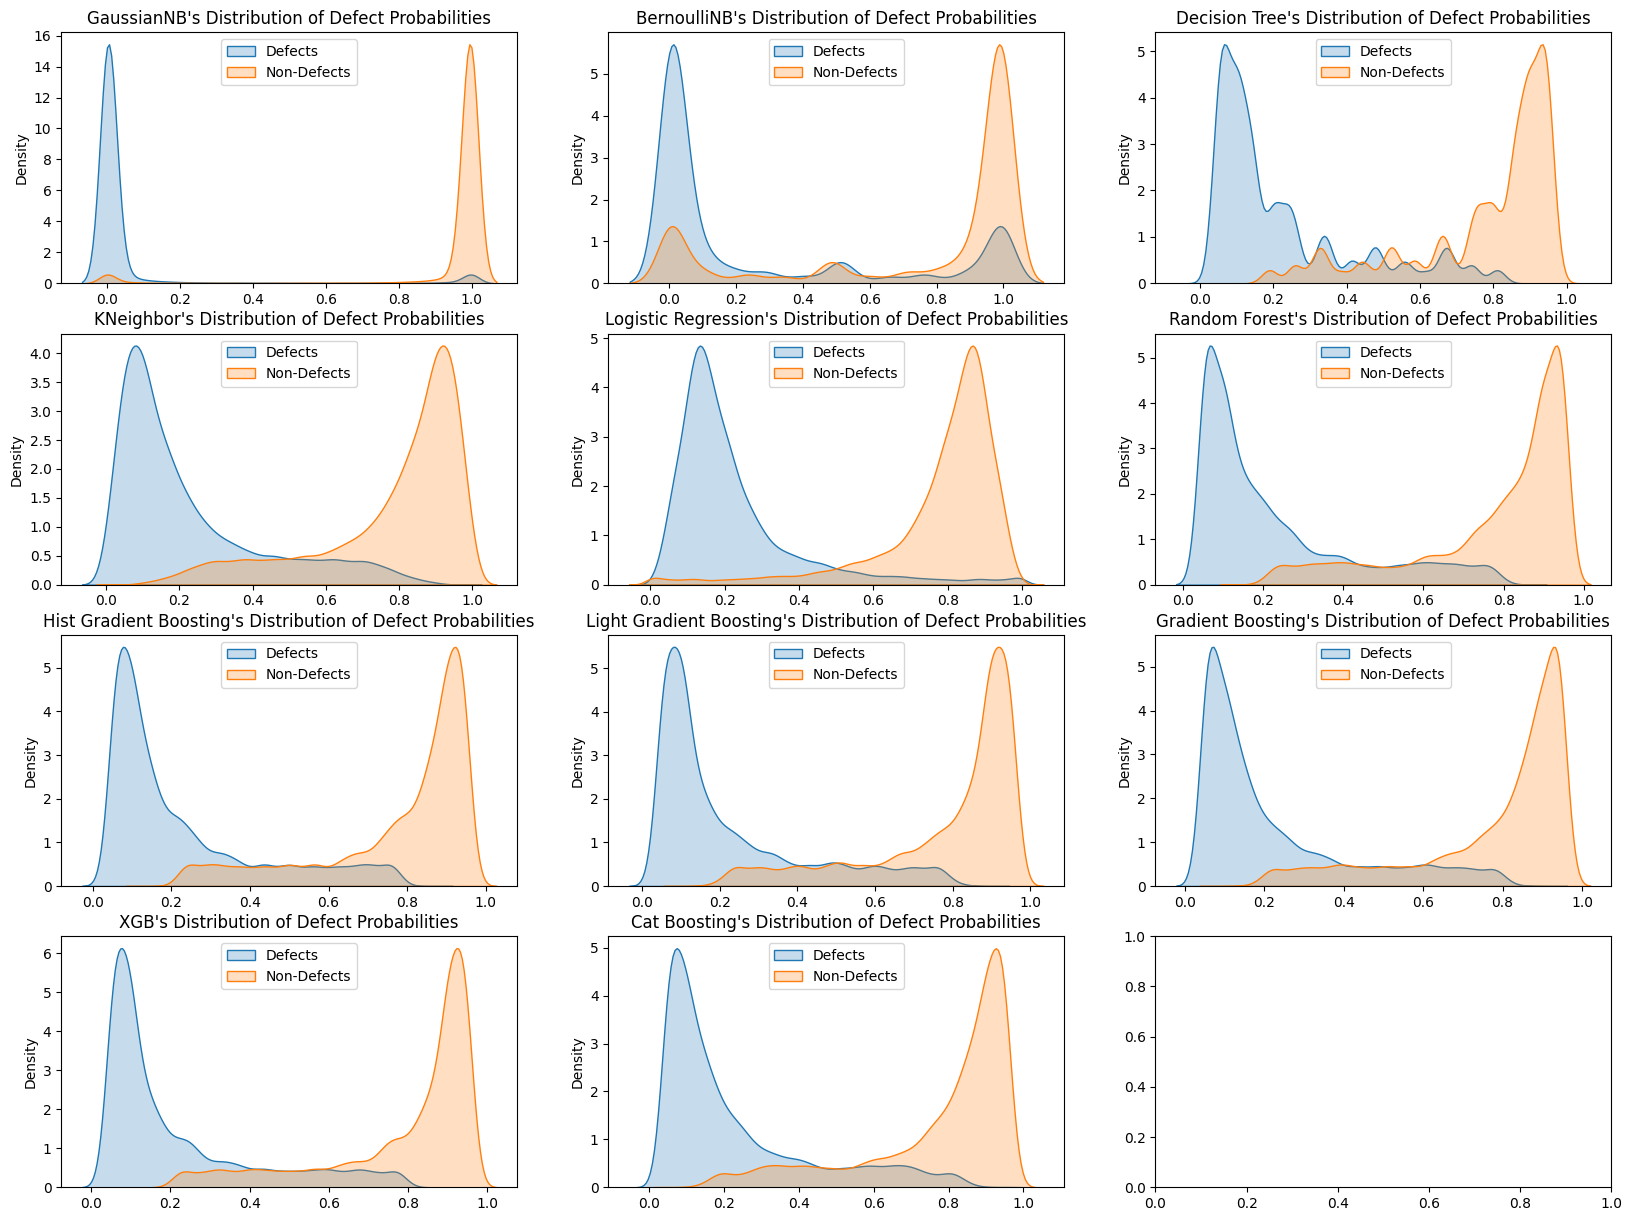

In [49]:
fig, ax = plt.subplots(4,3,figsize = (20,15))
sns.kdeplot(GNBModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[0,0],fill=True,label="Defects")
sns.kdeplot(GNBModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[0,0],fill=True,label="Non-Defects")
ax[0,0].legend(loc="upper center")
ax[0,0].set_title("GaussianNB's Distribution of Defect Probabilities")

sns.kdeplot(BNBModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[0,1],fill=True,label="Defects")
sns.kdeplot(BNBModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[0,1],fill=True,label="Non-Defects")
ax[0,1].legend(loc="upper center")
ax[0,1].set_title("BernoulliNB's Distribution of Defect Probabilities")

sns.kdeplot(DTModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[0,2],fill=True,label="Defects")
sns.kdeplot(DTModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[0,2],fill=True,label="Non-Defects")
ax[0,2].legend(loc="upper center")
ax[0,2].set_title("Decision Tree's Distribution of Defect Probabilities")

sns.kdeplot(KNNModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[1,0],fill=True,label="Defects")
sns.kdeplot(KNNModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[1,0],fill=True,label="Non-Defects")
ax[1,0].legend(loc="upper center")
ax[1,0].set_title("KNeighbor's Distribution of Defect Probabilities")

sns.kdeplot(LGRModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[1,1],fill=True,label="Defects")
sns.kdeplot(LGRModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[1,1],fill=True,label="Non-Defects")
ax[1,1].legend(loc="upper center")
ax[1,1].set_title("Logistic Regression's Distribution of Defect Probabilities")

sns.kdeplot(RFModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[1,2],fill=True,label="Defects")
sns.kdeplot(RFModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[1,2],fill=True,label="Non-Defects")
ax[1,2].legend(loc="upper center")
ax[1,2].set_title("Random Forest's Distribution of Defect Probabilities")

sns.kdeplot(HGBModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[2,0],fill=True,label="Defects")
sns.kdeplot(HGBModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[2,0],fill=True,label="Non-Defects")
ax[2,0].legend(loc="upper center")
ax[2,0].set_title("Hist Gradient Boosting's Distribution of Defect Probabilities")

sns.kdeplot(LGBMModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[2,1],fill=True,label="Defects")
sns.kdeplot(LGBMModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[2,1],fill=True,label="Non-Defects")
ax[2,1].legend(loc="upper center")
ax[2,1].set_title("Light Gradient Boosting's Distribution of Defect Probabilities")

sns.kdeplot(GBModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[2,2],fill=True,label="Defects")
sns.kdeplot(GBModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[2,2],fill=True,label="Non-Defects")
ax[2,2].legend(loc="upper center")
ax[2,2].set_title("Gradient Boosting's Distribution of Defect Probabilities")

sns.kdeplot(XGBModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[3,0],fill=True,label="Defects")
sns.kdeplot(XGBModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[3,0],fill=True,label="Non-Defects")
ax[3,0].legend(loc="upper center")
ax[3,0].set_title("XGB's Distribution of Defect Probabilities")

sns.kdeplot(CBModel.predict_proba(TestingData_cleaned_standardized)[:,1],ax=ax[3,1],fill=True,label="Defects")
sns.kdeplot(CBModel.predict_proba(TestingData_cleaned_standardized)[:,0],ax=ax[3,1],fill=True,label="Non-Defects")
ax[3,1].legend(loc="upper center")
ax[3,1].set_title("Cat Boosting's Distribution of Defect Probabilities")